In [37]:
#import PyStan
import stan
import nest_asyncio # https://pystan.readthedocs.io/en/latest/faq.html
nest_asyncio.apply()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import arviz as az # For visualization and loo
import seaborn as sns 
from patsy import dmatrices

In [19]:
data = pd.read_csv('data_h.csv', encoding='ISO-8859-1')
data.head(5).columns

/var/folders/5s/b6g_tw4n3t3fbn7c24jtsd2m0000gn/T/ipykernel_65170/136217113.py:1: DtypeWarning: Columns (3,8,9,12,13,15,21,23,24,26,32,37,49,51,52,54,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_h.csv', encoding='ISO-8859-1')


Index(['Unnamed: 0', 'X', 'Country', 'ID', 'Test_date', 'obs_n.x',
       'Test_name.x', 'DOB_est', 'Birth_year', 'Grade', 'Gender',
       'Program_entry', 'Eng_exp', 'Prior_Eng', 'AOA.x', 'AOA_date.x',
       'Eng_duration.x', 'nl', 'N_IE', 'NL_family', 'FL', 'L3_exp', 'LD.x',
       'Listening_score', 'Listening_proficiency', 'Speaking_score',
       'Speaking_proficiency', 'Writing_score', 'Writing_proficiency',
       'Reading_score', 'Reading_proficiency', 'Oral_score.x',
       'Oral_proficiency', 'Literacy_score.x', 'Literacy_proficiency',
       'Overall_score.x', 'Overall_proficiency', 'Comments', 'obs_type',
       'school_id', 'unique_ID', 'obs_n_new', 'author.x', 'obs_n.y',
       'Overall_score.y', 'Oral_score.y', 'Literacy_score.y', 'Genetic_score',
       'AOA.y', 'AOA_date.y', 'Eng_duration.y', 'Test_name.y', 'NL', 'LD.y',
       'author.y', 'AOA', 'Eng_duration', 'AOA_date', 'Overall_score',
       'dis_syntactic', 'dis_phonology', 'dis_genetic', 'Genetic_score_j',
  

## linear regression

In [ ]:
data_sub = data[['Overall_score', 'dis_genetic', 'Eng_duration', 'AOA']]
covariate_cols = [x for x in data_sub.columns if x!= 'Overall_score']
regeq = 'Overall_score ~ 1 + {}'.format(' + '.join(covariate_cols))
y, X = dmatrices(regeq, data=data_sub)
y = [int(yy[0]) for yy in np.asarray(y)]

In [ ]:
prior_width = 10^3
stan_file = 'linear_regression.stan'
with open(stan_file) as file:
    model_code = file.read()
print(model_code)

stan_data = {
                'N' : len(y),
                'Nattr' : X.shape[1],
                'X' : X,
                'y' : y,
                'prior_width' : prior_width 
             }

In [ ]:
compiled_model = stan.build(model_code, data=stan_data, random_seed=1)

In [ ]:
fit = compiled_model.sample(num_chains=2, num_warmup = 200, num_samples= 1000)
idata = az.from_pystan(posterior=fit, posterior_model=compiled_model)
regeq
summary = az.summary(fit)
summary
az.plot_posterior(idata)

## Mixture Model

In [20]:
data_sub = data[['Overall_score', 'dis_genetic', 'Eng_duration', 'age']].dropna()
data_sub

Overall_score  dis_genetic  Eng_duration        age
0             155.0          0.9           0.0   6.090411
1             264.0          0.9          13.0   7.175342
2             289.0          0.9          21.0   7.838356
3             306.0          0.9          25.0   8.175342
4             278.0          0.9          30.0   8.594521
...             ...          ...           ...        ...
6232          267.0          0.9          45.0   8.838356
6233          155.0          1.0           0.0   6.087671
6234          200.0          1.0          45.0   9.838356
6235          161.0          1.0           0.0   8.090411
6236          301.0          1.0          45.0  11.841096

[1585 rows x 4 columns]

In [172]:
data_sub = data_sub[data_sub['Overall_score'] >100]

In [173]:
stan_data = {'y': data_sub.Overall_score.to_list(), 
             'AGE': data_sub.age.to_list(), 
             'DURATION': data_sub.Eng_duration.to_list(),
             'DISTANCE': data_sub.dis_genetic.to_list(),
             'N': len(data_sub)}
stan_data

{'y': [155.0,
  264.0,
  289.0,
  306.0,
  278.0,
  295.0,
  307.0,
  349.0,
  155.0,
  274.0,
  299.0,
  322.0,
  336.0,
  339.0,
  166.0,
  286.0,
  330.0,
  166.0,
  294.0,
  320.0,
  155.0,
  257.0,
  314.0,
  289.0,
  334.0,
  337.0,
  276.0,
  258.0,
  308.0,
  288.0,
  334.0,
  155.0,
  266.0,
  312.0,
  178.0,
  322.0,
  344.0,
  166.0,
  162.0,
  229.0,
  199.0,
  166.0,
  246.0,
  272.0,
  319.0,
  184.0,
  266.0,
  166.0,
  196.0,
  318.0,
  323.0,
  235.0,
  252.0,
  341.0,
  364.0,
  265.0,
  321.0,
  166.0,
  200.0,
  320.0,
  331.0,
  348.0,
  200.0,
  331.0,
  348.0,
  172.0,
  328.0,
  338.0,
  355.0,
  215.0,
  358.0,
  287.0,
  305.0,
  354.0,
  322.0,
  382.0,
  329.0,
  370.0,
  279.0,
  369.0,
  414.0,
  338.0,
  382.0,
  413.0,
  167.0,
  343.0,
  167.0,
  299.0,
  357.0,
  155.0,
  184.0,
  348.0,
  377.0,
  389.0,
  155.0,
  251.0,
  155.0,
  195.0,
  356.0,
  403.0,
  405.0,
  155.0,
  155.0,
  268.0,
  155.0,
  290.0,
  362.0,
  155.0,
  155.0,
  298.0,
  207

In [174]:
stan_file = 'mixture.stan'
with open(stan_file) as file:
    model_code = file.read()
print(model_code)

data {
  int<lower=1> N;          // number of data points
  array[N] real y;         // observations

  vector[N] AGE;           // predictor for component 1
  vector[N] DURATION;      // predictor for component 1
  vector[N] DISTANCE;      // predictor for theta
}

parameters {
  vector<lower=0>[2] sigma;   // scales of mixture components

  real alpha1;                // intercept for AGE
  real beta1;                 // slope for AGE

  real alpha2;                // intercept for DURATION
  real beta2;                 // slope for DURATION

  real alpha_t;               // intercept for theta
  real beta_l1;               // slope for first language
  real beta_l2;               // slope for second language
  real beta_d;                // slope for distance
}

model {
  //priors
  sigma ~ lognormal(0, 50);

  alpha1 ~ normal(0, 10);
  beta1 ~ normal(40, 10);
  alpha2 ~ normal(0, 10);
  beta2 ~ normal(40, 10);
  alpha_t ~ normal(0, 10);
  beta_l1 ~ normal(0, 10);
  beta_l2 ~ norma

In [175]:
compiled_model = stan.build(model_code, data=stan_data, random_seed=1)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/var/folders/5s/b6g_tw4n3t3fbn7c24jtsd2m0000gn/T/httpstan_mgbbhxwb/model_clma7375.stan', line 32, column 17: Argument
    40 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/var/folders/5s/b6g_tw4n3t3fbn7c24jtsd2m0000gn/T/httpstan_mgbbhxwb/model_clma7375.stan', line 30, column 17: Argument
    40 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Warning in '/var/folders/5s/b6g_tw4n3t3fbn7c24jtsd2m0000gn/T/httpstan_mgbbhxwb/model_clma7375.stan', line 27, column 23: Argument
    50 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).


In [176]:
def init_values():
    return {
        "sigma": [10, 10],
        "alpha1": 0,
        "beta1": 30,
        "alpha2": 0,
        "beta2": 30,
        "alpha_t": 0,
        "beta_l1": 0,
        "beta_l2": 0,
        "beta_d": 0,
    }

num_chains = 2
init_values_list = [init_values() for _ in range(num_chains)]

fit = compiled_model.sample(
    num_chains=num_chains,
    num_warmup=1000,
    num_samples=2000,
    init=init_values_list,
)


Sampling:   0%
Sampling:   0% (1/6000)
Sampling:   0% (2/6000)
Sampling:   2% (101/6000)
Sampling:   3% (200/6000)
Sampling:   5% (300/6000)
Sampling:   7% (400/6000)
Sampling:   8% (500/6000)
Sampling:  10% (600/6000)
Sampling:  12% (700/6000)
Sampling:  13% (800/6000)
Sampling:  15% (900/6000)
Sampling:  17% (1000/6000)
Sampling:  18% (1100/6000)
Sampling:  20% (1200/6000)
Sampling:  22% (1300/6000)
Sampling:  23% (1400/6000)
Sampling:  25% (1500/6000)
Sampling:  27% (1601/6000)
Sampling:  28% (1700/6000)
Sampling:  30% (1800/6000)
Sampling:  32% (1900/6000)
Sampling:  33% (2000/6000)
Sampling:  35% (2100/6000)
Sampling:  37% (2200/6000)
Sampling:  38% (2300/6000)
Sampling:  40% (2400/6000)
Sampling:  42% (2500/6000)
Sampling:  43% (2600/6000)
Sampling:  45% (2700/6000)
Sampling:  47% (2800/6000)
Sampling:  48% (2900/6000)
Sampling:  50% (3000/6000)
Sampling:  52% (3100/6000)
Sampling:  53% (3200/6000)
Sampling:  55% (3300/6000)
Sampling:  57% (3400/6000)
Sampling:  58% (3500/6000)
S

In [177]:
az.summary(fit)

mean        sd  hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk   
sigma[0]   58.804     3.212  53.646    63.365      2.112    1.741       3.0  \
sigma[1]  984.119  1837.062  31.278  4991.013    965.922  747.190       3.0   
alpha1      1.999    14.473 -19.429    17.029      9.751    8.095       3.0   
beta1     114.463    22.387  90.439   140.640     15.737   13.302       3.0   
alpha2    150.547   147.597  -6.158   302.181    104.107   88.159       3.0   
beta2      23.322    13.174  11.829    49.443      7.770    6.174       3.0   
alpha_t    -2.191     6.199 -19.109     5.681      2.973    2.262       4.0   
beta_l1     0.203     0.103   0.019     0.350      0.066    0.056       3.0   
beta_l2    -1.518     1.520  -4.448    -0.209      0.993    0.815       2.0   
beta_d     -0.273     6.043 -10.866    13.979      1.081    1.582      27.0   

          ess_tail  r_hat  
sigma[0]      40.0   1.84  
sigma[1]      11.0   2.13  
alpha1        18.0   1.86  
beta1         32.0   1.84  
alpha2        18.0   1.92  
beta2         35.0   1.90  
alpha_t       22.0   1.86  
beta_l1       18.0   2.06  
beta_l2       11.0   2.34  
beta_d        62.0   1.98

In [198]:
def plot_stuff_about_model(idata, stan_data, fit):
    print ('CONVERGENCE CHECKS')
    az.plot_trace(idata)
    plt.figure(figsize=(10,6))
    plt.show()
    
    az.plot_rank(idata)
    plt.show()
    
    az.plot_autocorr(idata)
    
    # Plot local ESS. This plot, together with the quantile ESS plot, is recommended to check that there are enough samples for all the explored regions of parameter space. Checking local and quantile ESS is particularly relevant when working with HDI intervals as opposed to ESS bulk, which is relevant for point estimates.
    # https://python.arviz.org/en/stable/api/generated/arviz.plot_ess.html  
    az.plot_ess(idata)
    plt.show()
    
    # Plot ESS evolution as the number of samples increase. When the model is converging properly, both lines in this plot should be roughly linear.
    az.plot_ess(idata, kind='evolution')
    plt.show()
    
    print('IS THE MODEL GOOD?')
    az.plot_pair(idata)
    plt.show()

CONVERGENCE CHECKS


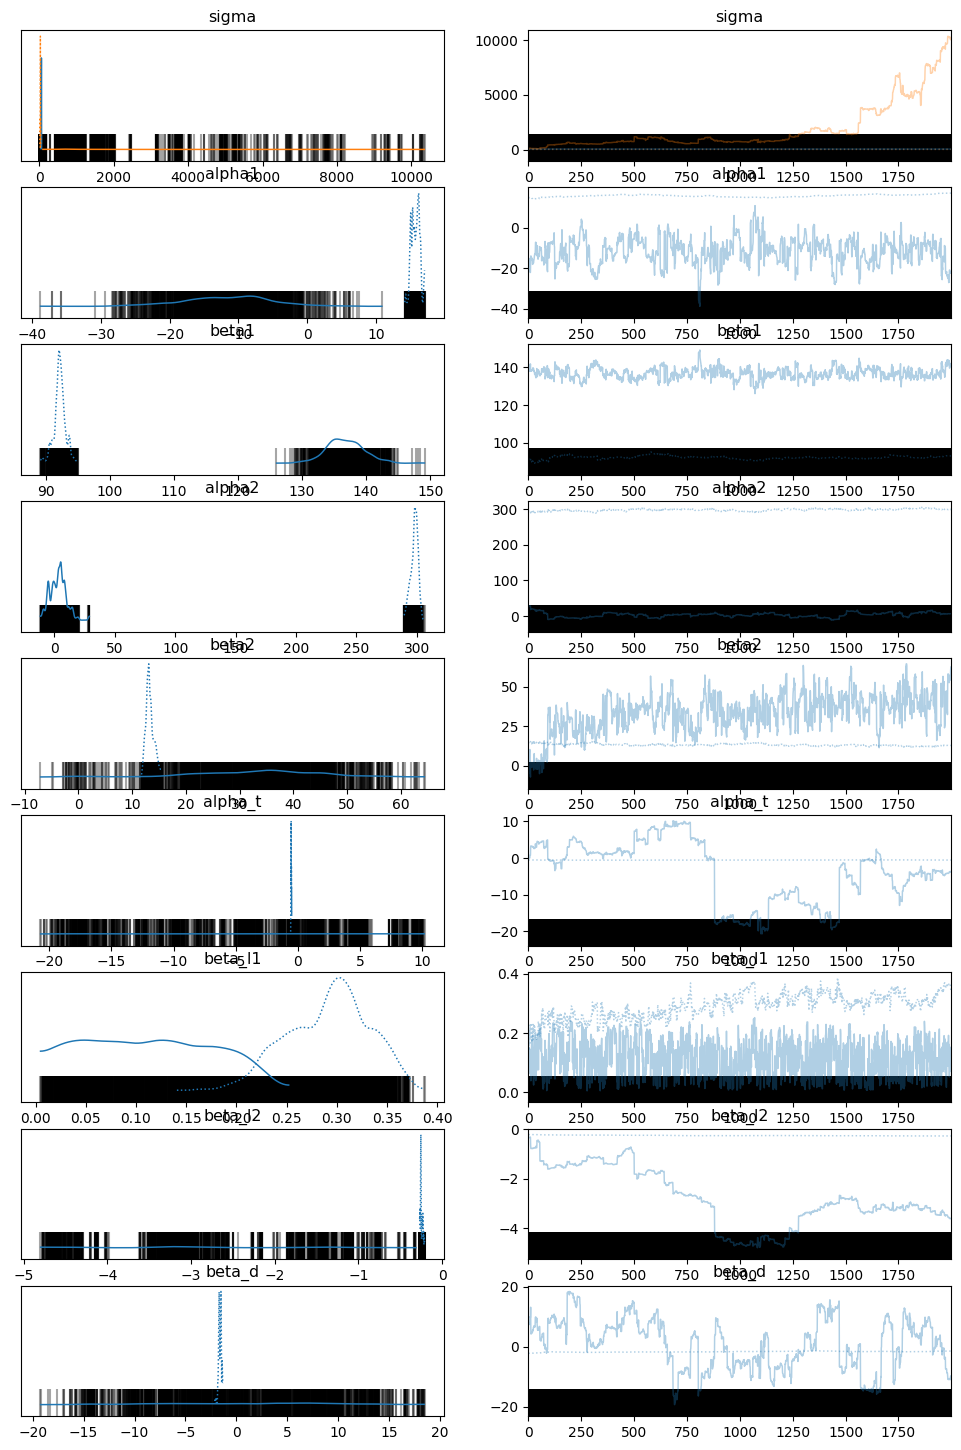

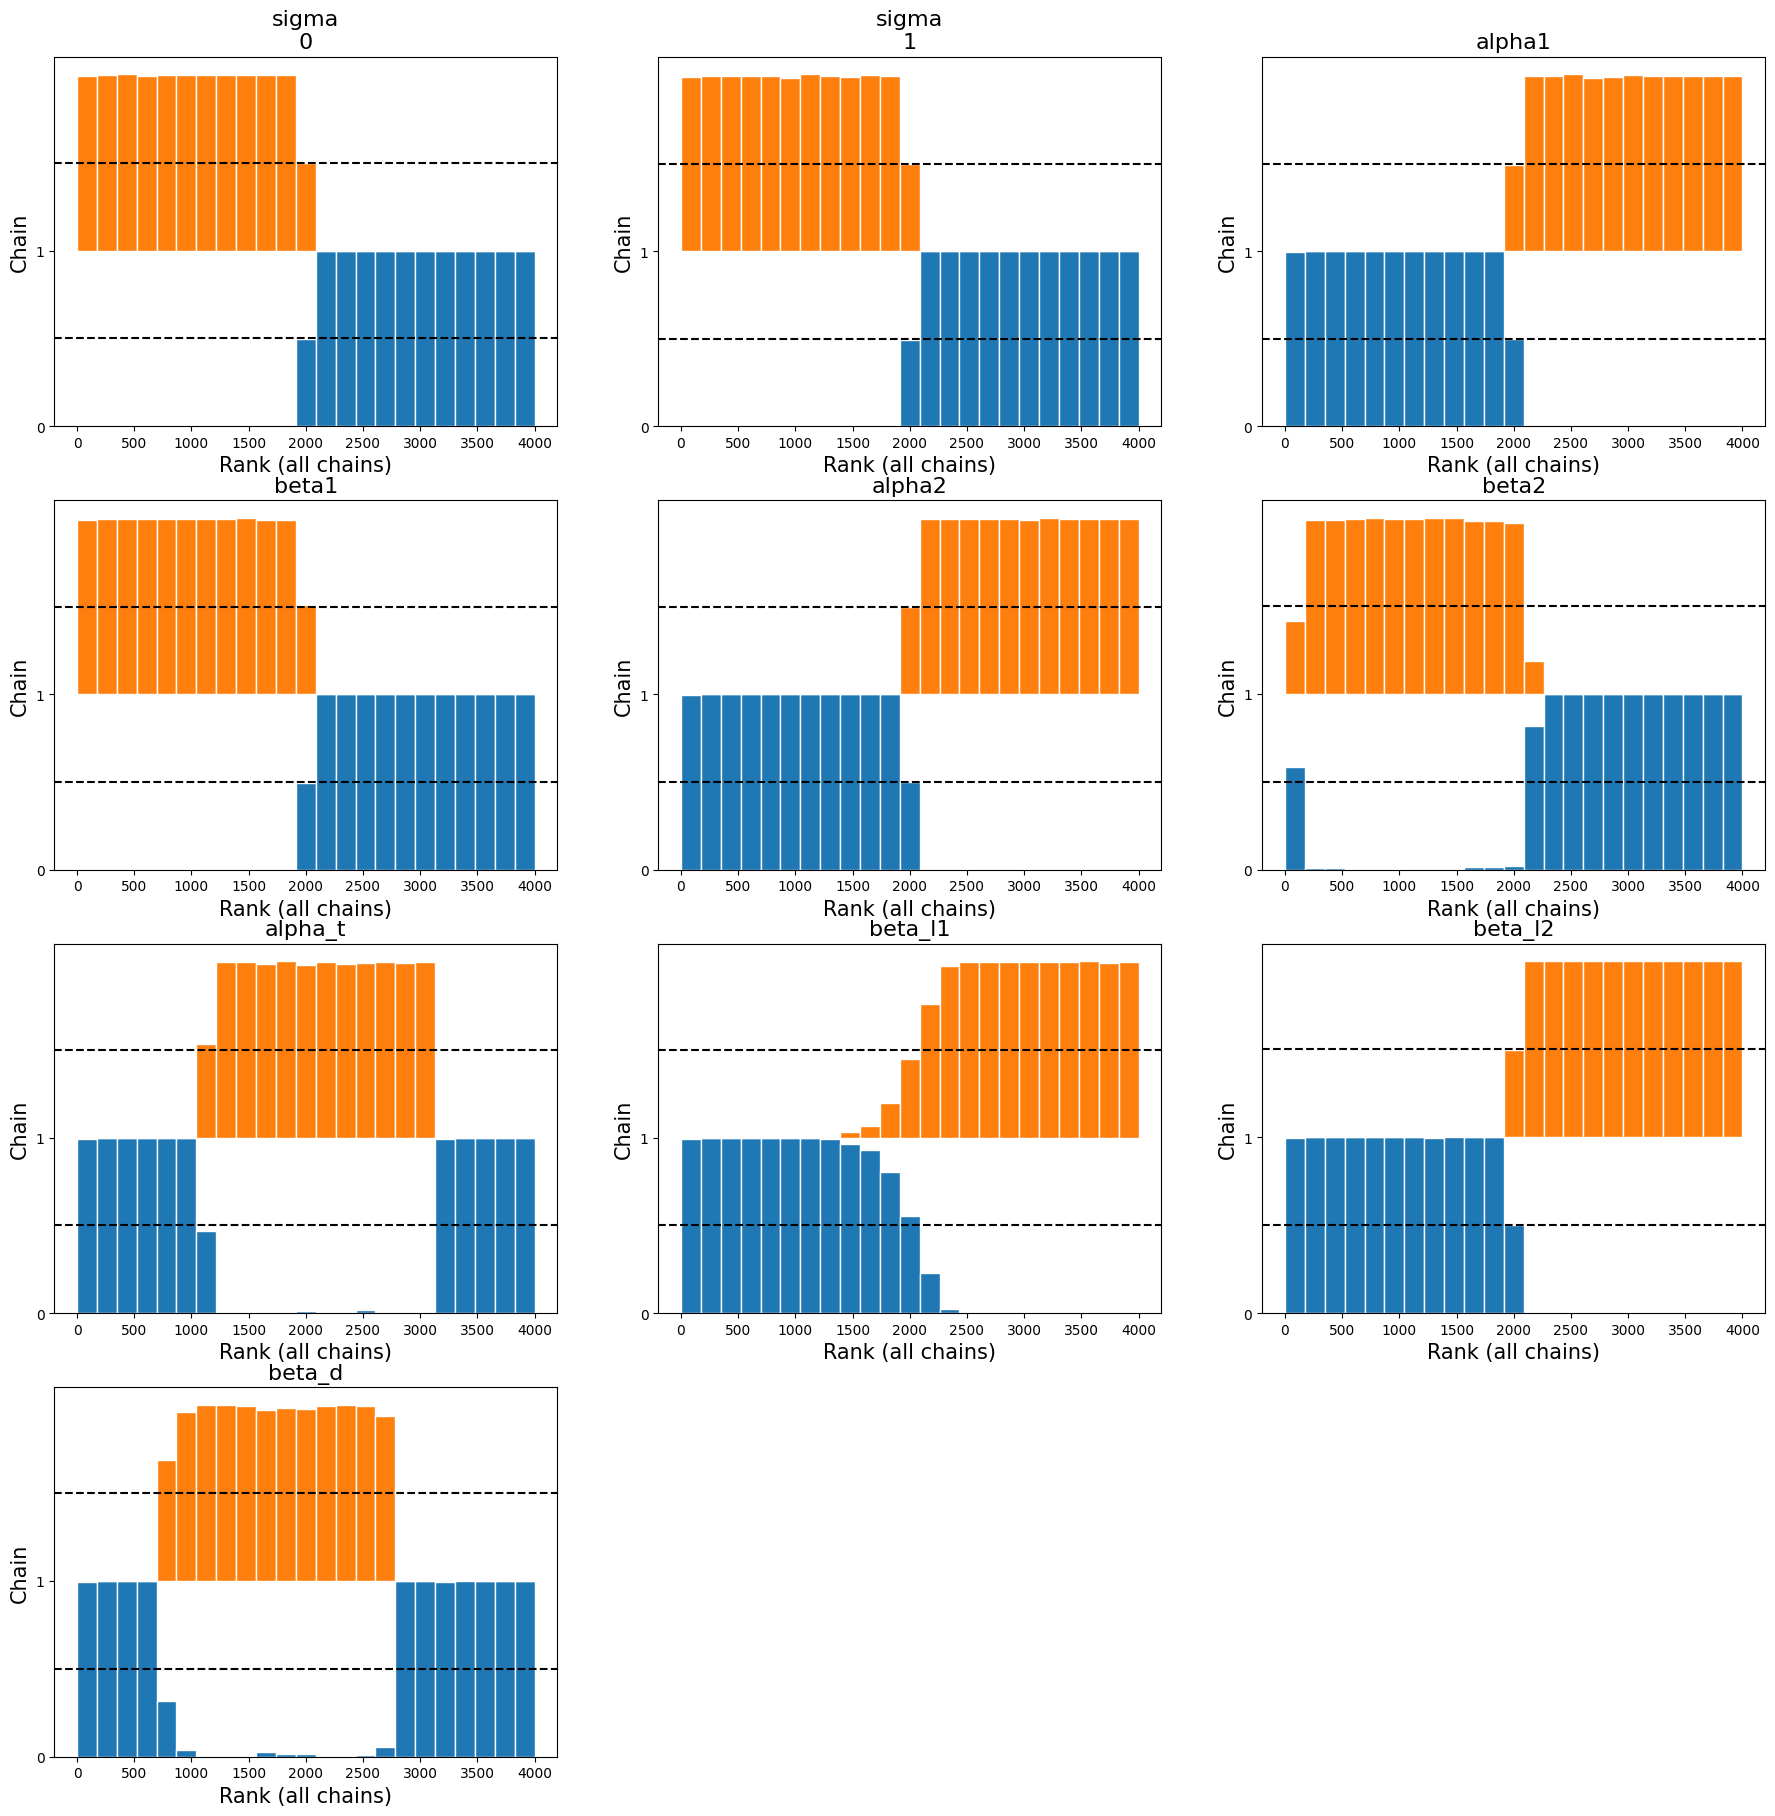

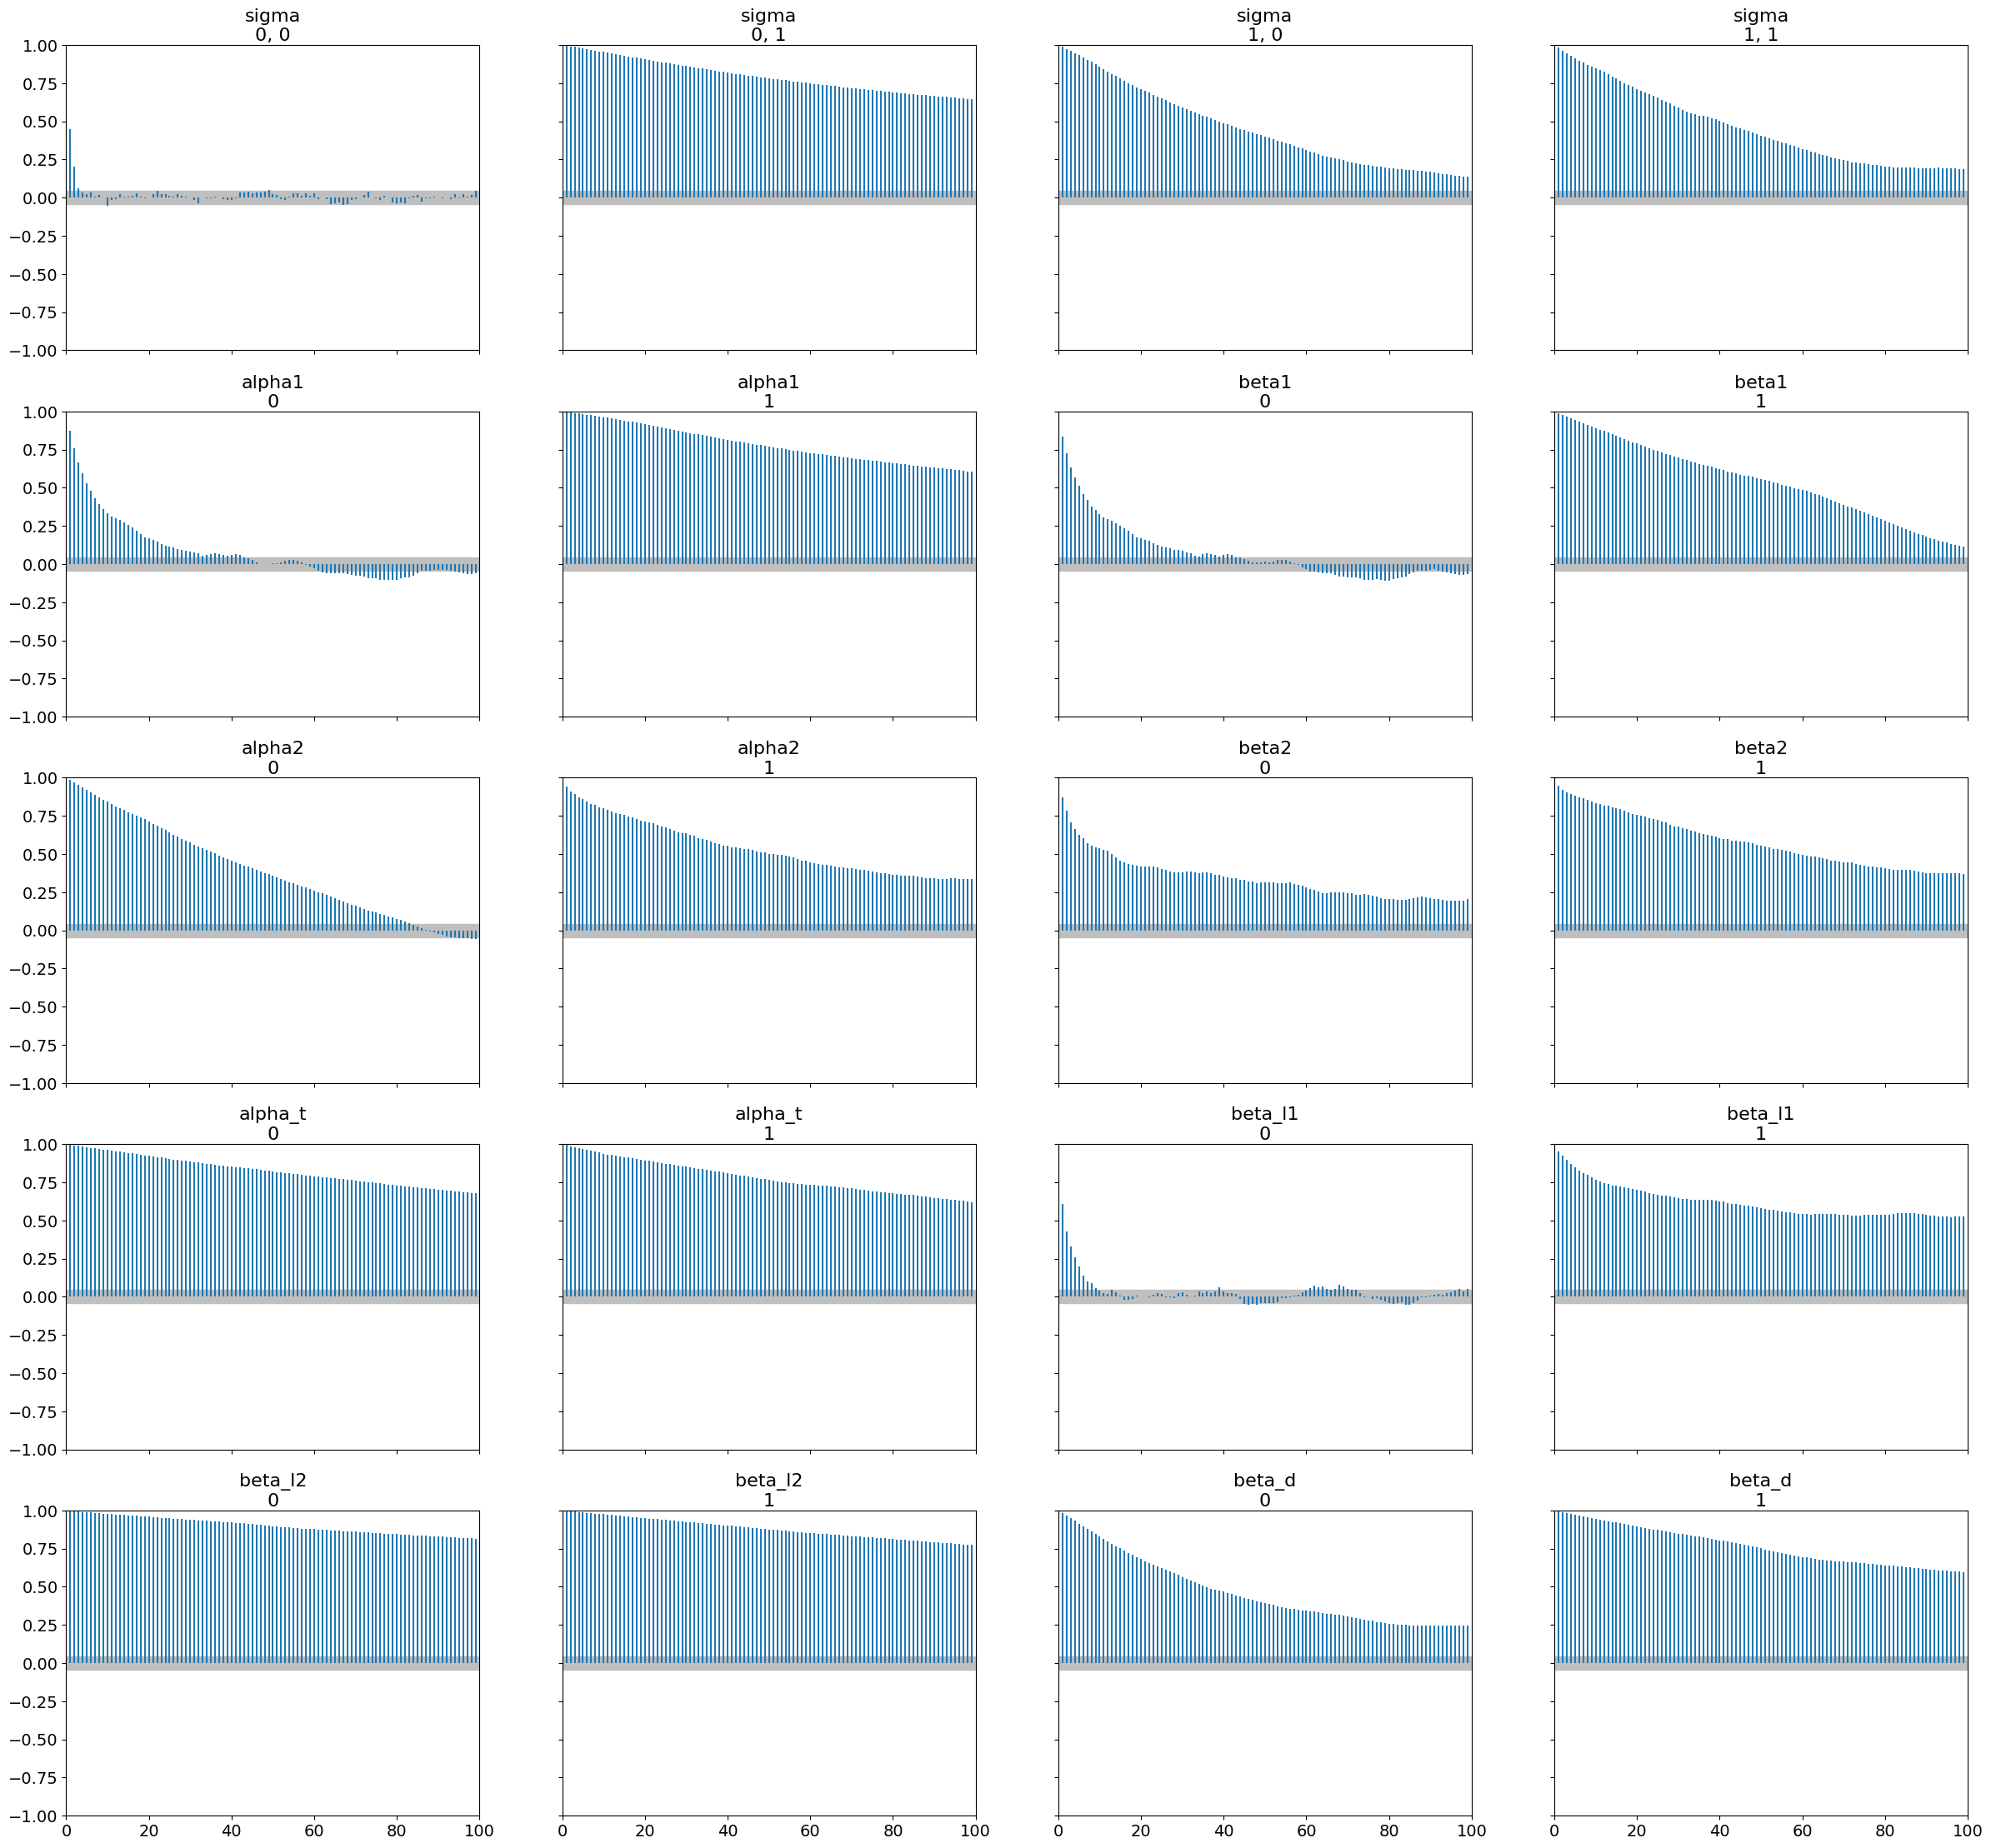

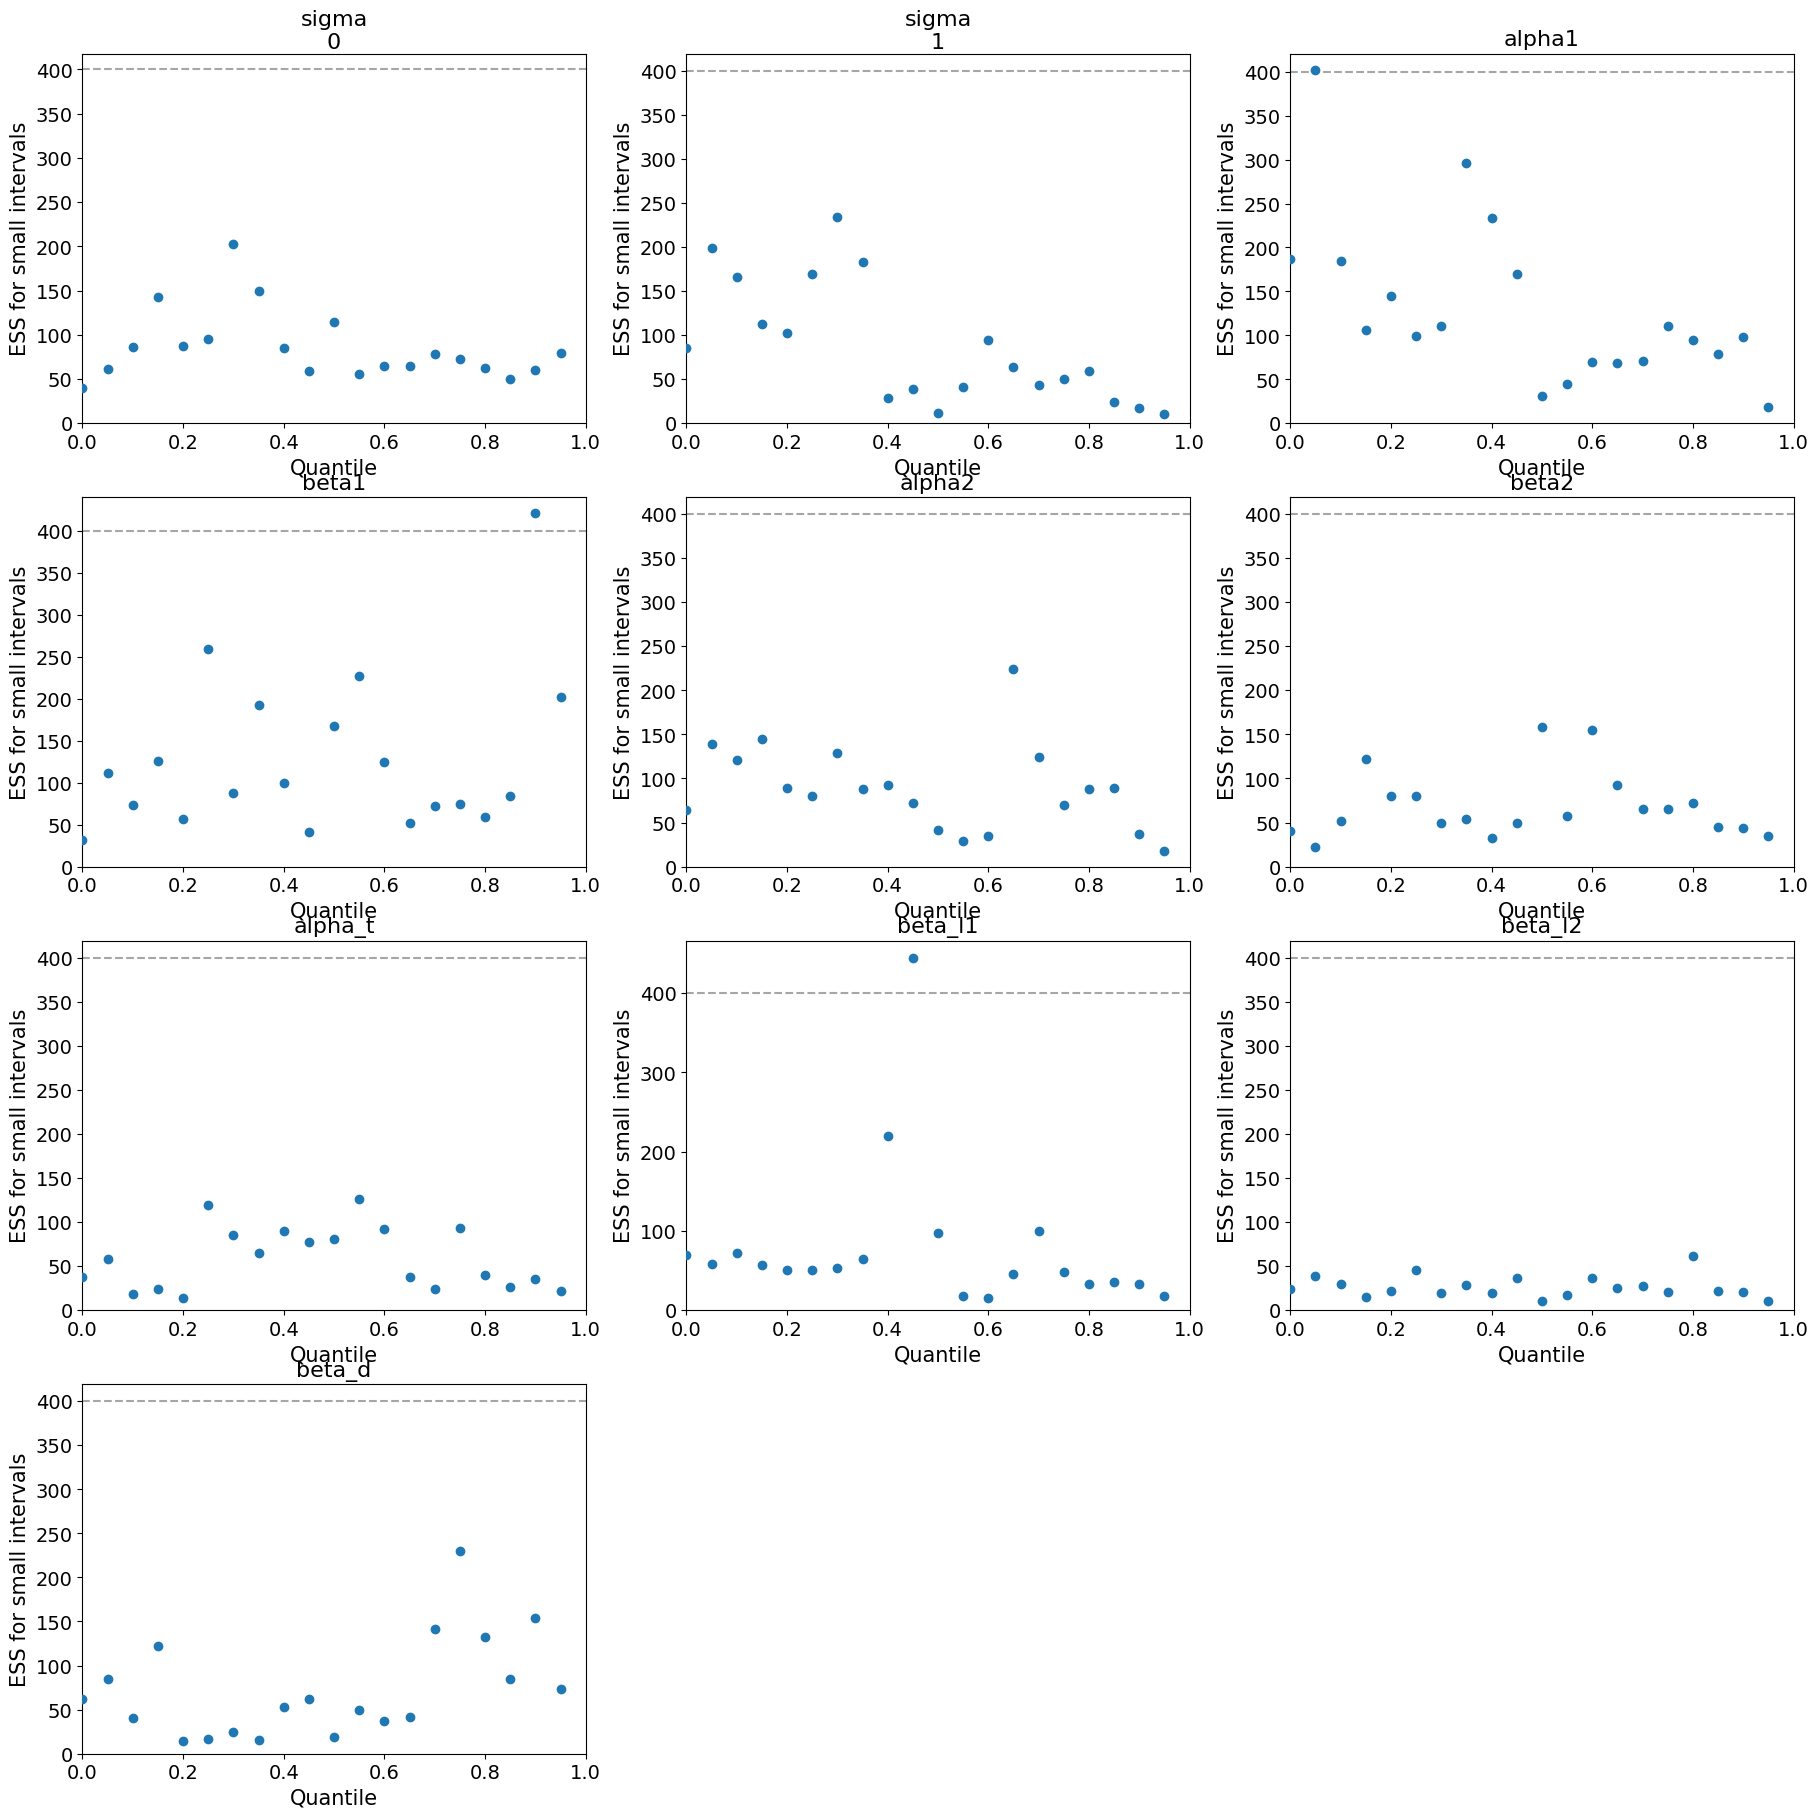

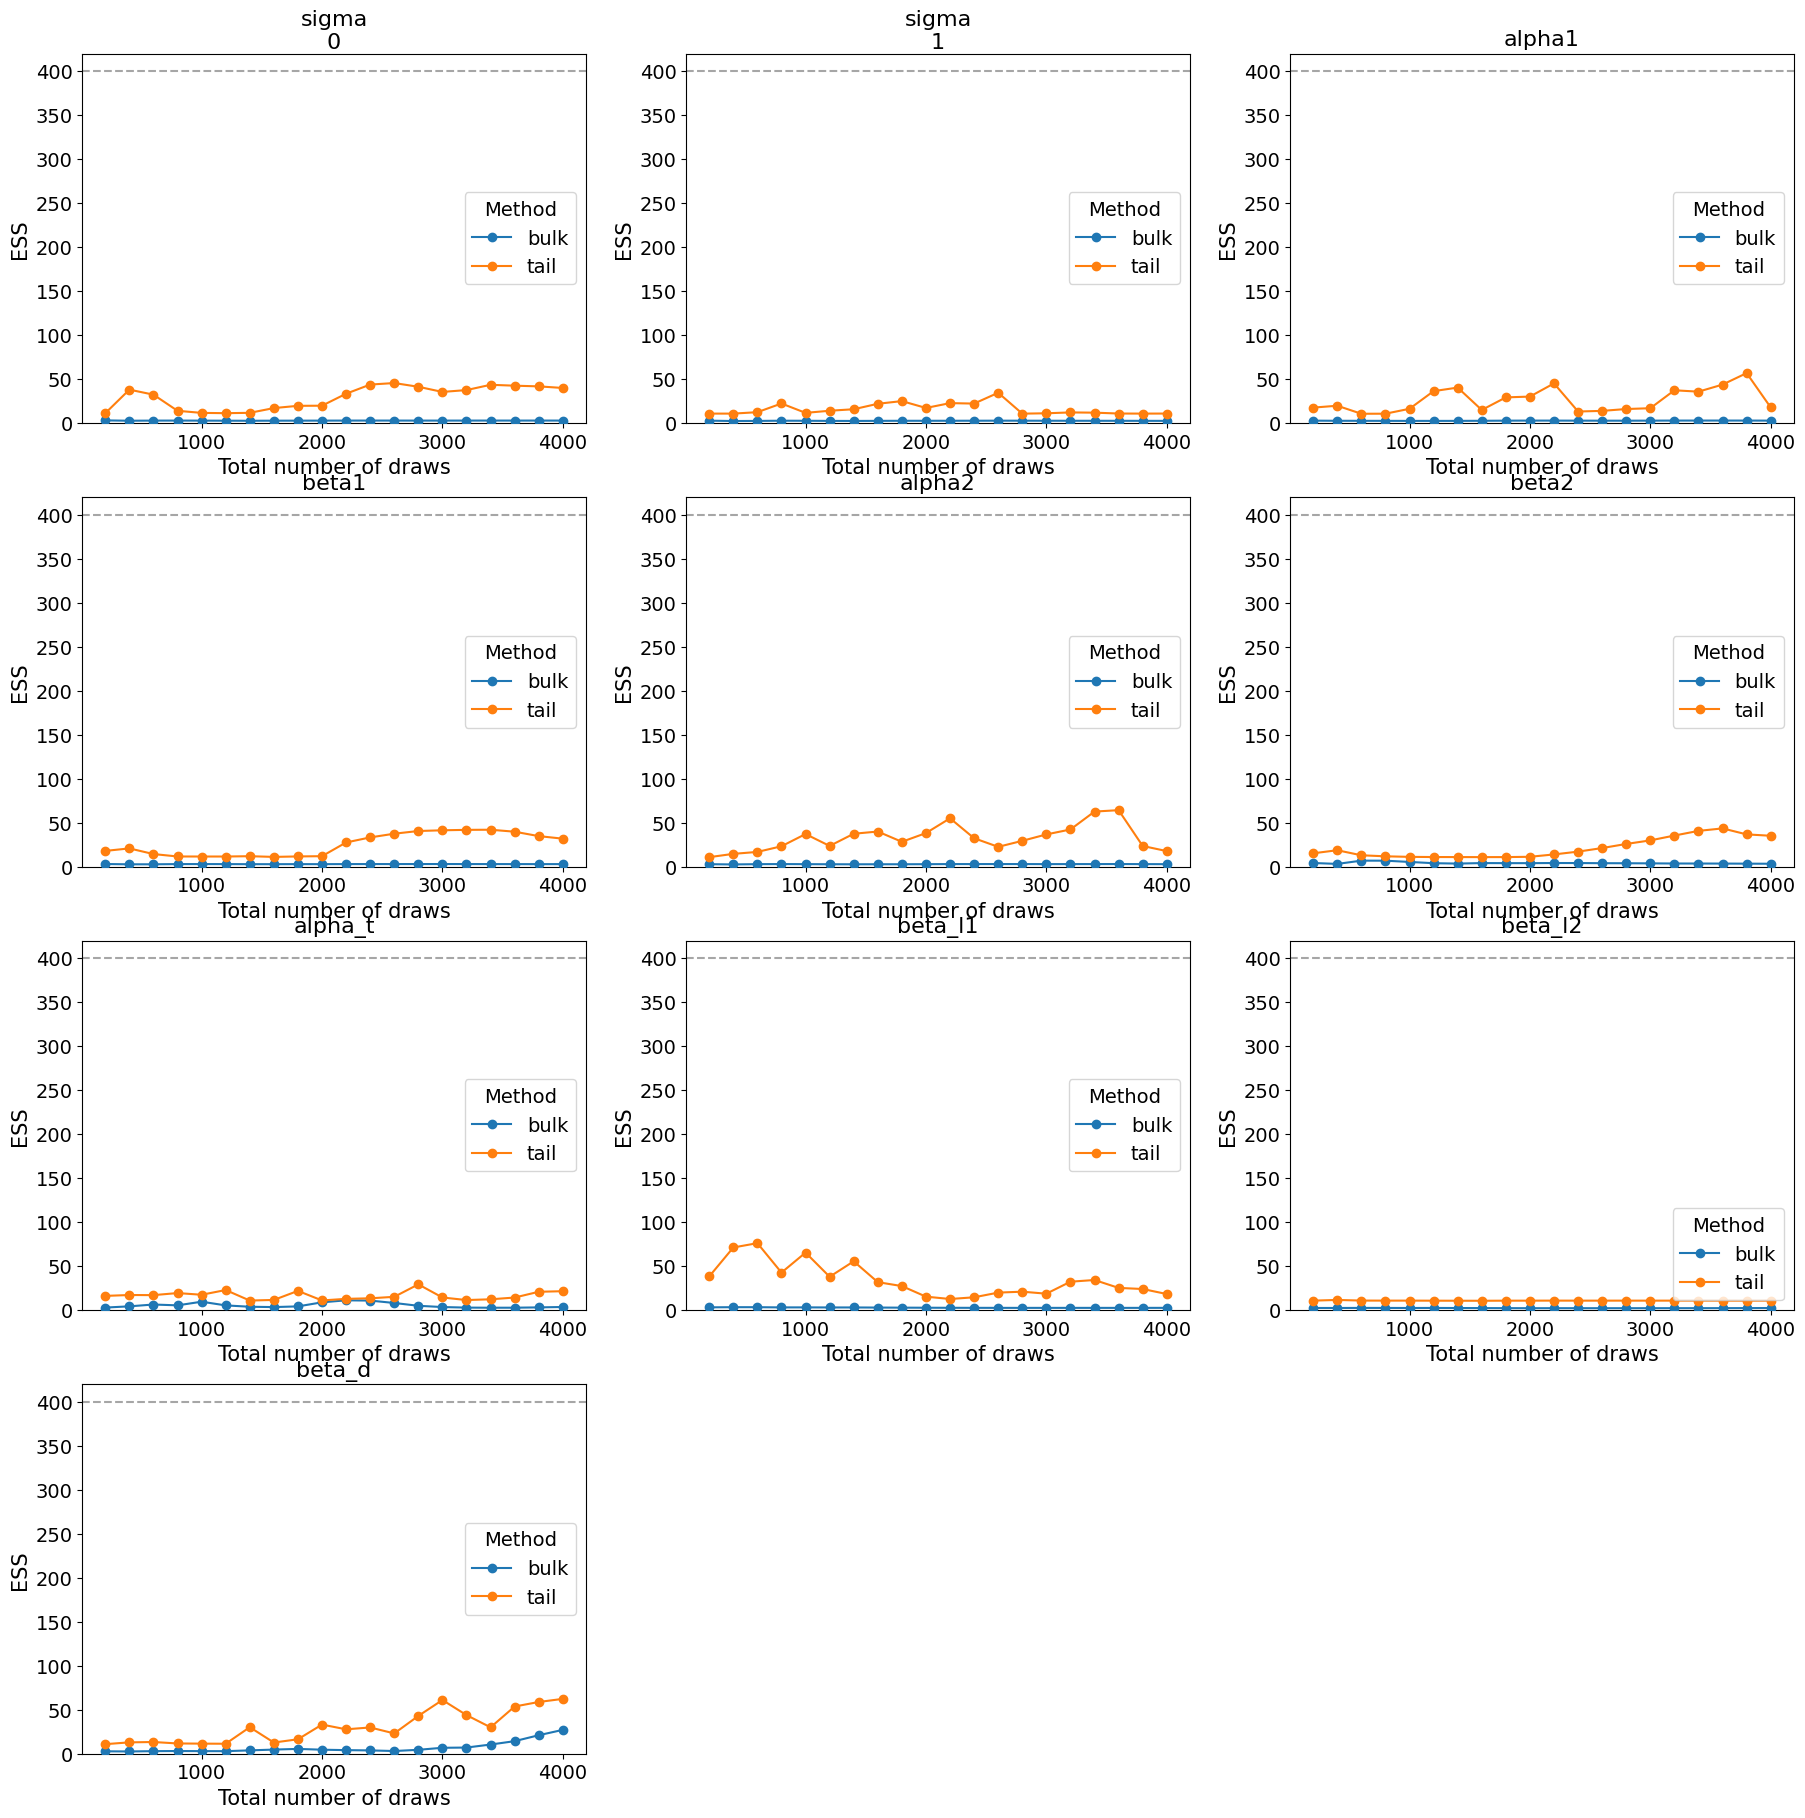

IS THE MODEL GOOD?


/usr/local/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


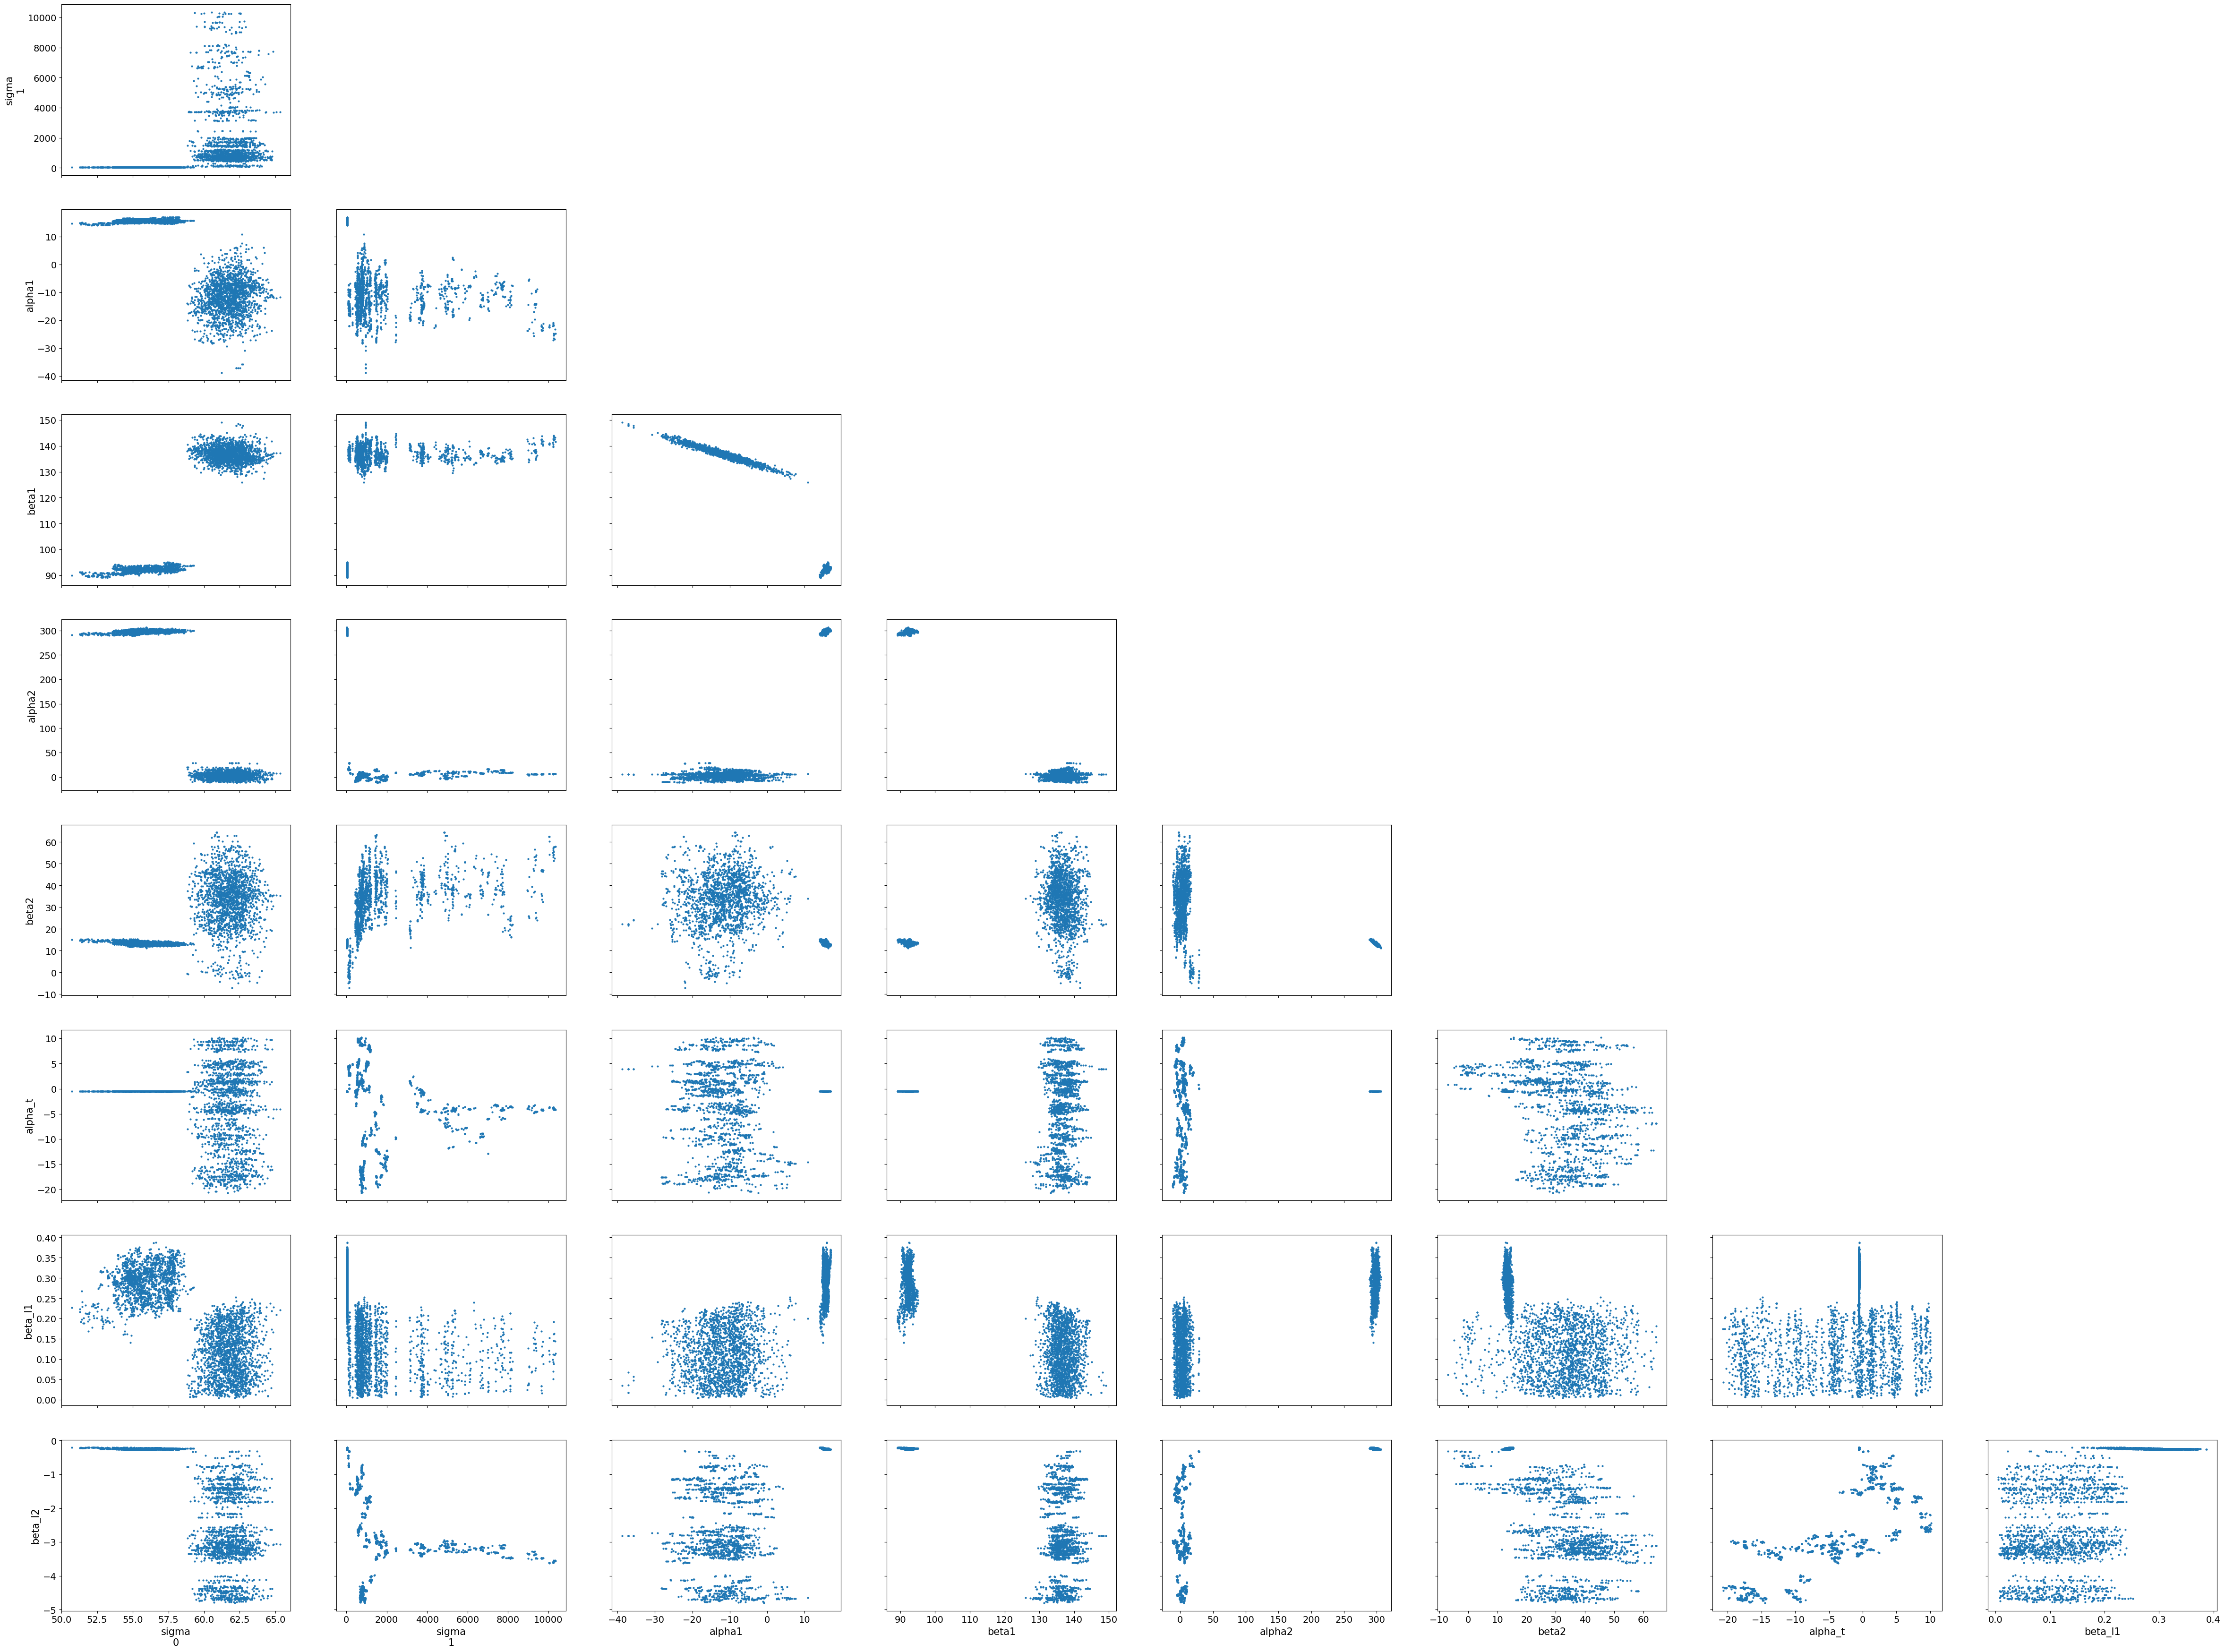

In [179]:
idata = az.from_pystan(posterior=fit, posterior_model=compiled_model)
plot_stuff_about_model(idata, stan_data, fit)


In [185]:
stan_file = 'mixture_simple.stan'
with open(stan_file) as file:
    model_code = file.read()
print(model_code)

data {
  int<lower=1> N;          // number of data points
  array[N] real y;         // observations

  vector[N] AGE;           // predictor for component 1
  vector[N] DURATION;      // predictor for component 1
  vector[N] DISTANCE;      // predictor for theta
}

parameters {
  real sigma;   // scales of mixture components
  real<lower = 0, upper = 1> exp;                 // exposure discount
  real<lower = 0> beta;                 // slope for DURATION

  real<lower = 0> alpha;                 // innate knowledge about langauge
  real alpha_d;               // intercept for theta
  real beta_d;                // slope for distance

  real alpha_t;               // intercept for theta
  real beta_l1;               // slope for first language
  real beta_l2;               // slope for second language
}

model {
  //priors
  alpha ~ normal(100, 10);
  sigma ~ lognormal(0, 10);
  beta ~ normal(100, 10);
  exp ~ normal(0.5,0.1);
  alpha_t ~ normal(0, 10);
  beta_l1 ~ normal(0, 10);
  b

In [186]:
compiled_model = stan.build(model_code, data=stan_data, random_seed=1)

Building...

In file included from /Users/weili/Library/Caches/httpstan/4.10.0/models/vf2akjtr/model_vf2akjtr.cpp:2:
In file included from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file included from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/math.hpp:19:
In file included from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/math/rev.hpp:10:
In file included from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun.hpp:26:
/usr/local/lib/python3.11/site-packages/httpstan/include/stan/math/rev/fun/beta.hpp:70:32: warning: lambda capture 'b' is not used [-Wunused-lambda-capture]
                           [a, b, digamma_ab](auto& vi) mutable {
                             ~~^
In file included from /Users/weili/Library/Caches/httpstan/4.10.0/models/vf2akjtr/model_vf2akjtr.cpp:2:
In file included from /usr/local/lib/python3.11/site-packages/httpstan/include/stan/model/model_header.hpp:4:
In file inclu

ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/usr/local/lib/python3.11/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::Q2' from file 'build/temp.macosx-11-x86_64-cpython-311/Users/weili/Library/Caches/httpstan/4.10.0/models/vf2akjtr/model_vf2akjtr.o' means the weak symbol cannot be overridden at runtime. This was likely caused by different translation units being compiled with different visibility settings.
ld: warning: direct access in function 'long double boost::math::detail::bessel_j0<long double>(long double)' from file '/usr/local/lib/python3.11/site-packages/httpstan/stan_services.o' to global weak symbol 'long double boost::math::detail::bessel_j0<long double>(long double)::P2' from file 'build/temp.macosx-11-x86_64-cpython-311/Users/weili/Library/Caches/httpstan/4.10.0/models/vf2akjtr/model_vf2akjtr.o' means the weak s

In [200]:
def init_values():
    return {
        "sigma": [10, 10],
        "exp": 0.5,
        "beta": 30,
        "alpha": 100,
        "alpha_d": 0,
        "alpha_t": 0,
        "beta_l1": 0,
        "beta_l2": 0,
        "beta_d": 0,
    }

num_chains = 2
init_values_list = [init_values() for _ in range(num_chains)]

fit = compiled_model.sample(
    num_chains=num_chains,
    num_warmup=3000,
    num_samples=5000,
    init=init_values_list,
)

Sampling:   0%
Sampling:   0% (1/16000)
Sampling:   0% (2/16000)
Sampling:   1% (101/16000)
Sampling:   1% (200/16000)
Sampling:   2% (300/16000)
Sampling:   2% (400/16000)
Sampling:   3% (500/16000)
Sampling:   4% (600/16000)
Sampling:   4% (700/16000)
Sampling:   5% (800/16000)
Sampling:   6% (900/16000)
Sampling:   6% (1000/16000)
Sampling:   7% (1100/16000)
Sampling:   8% (1200/16000)
Sampling:   8% (1300/16000)
Sampling:   9% (1400/16000)
Sampling:   9% (1500/16000)
Sampling:  10% (1600/16000)
Sampling:  11% (1700/16000)
Sampling:  11% (1800/16000)
Sampling:  12% (1900/16000)
Sampling:  12% (2000/16000)
Sampling:  13% (2100/16000)
Sampling:  14% (2200/16000)
Sampling:  14% (2300/16000)
Sampling:  15% (2400/16000)
Sampling:  16% (2500/16000)
Sampling:  16% (2600/16000)
Sampling:  17% (2700/16000)
Sampling:  18% (2800/16000)
Sampling:  18% (2900/16000)
Sampling:  19% (3000/16000)
Sampling:  19% (3100/16000)
Sampling:  20% (3200/16000)
Sampling:  21% (3300/16000)
Sampling:  21% (3400

In [201]:
az.summary(fit)

mean     sd   hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk   
sigma     26.362  0.435   25.527   27.120      0.122    0.088      13.0  \
exp        0.259  0.014    0.227    0.282      0.006    0.004       6.0   
beta      71.894  0.638   70.776   73.074      0.273    0.204       6.0   
alpha    169.678  1.198  167.553  171.854      0.421    0.309       8.0   
alpha_d    0.167  0.169   -0.114    0.483      0.087    0.067       3.0   
beta_d    -0.297  0.262   -0.874   -0.007      0.170    0.139       3.0   
alpha_t    0.108  0.131   -0.113    0.312      0.065    0.049       4.0   
beta_l1    1.037  0.121    0.855    1.307      0.068    0.054       3.0   
beta_l2   -0.709  0.143   -0.892   -0.431      0.093    0.077       3.0   

         ess_tail  r_hat  
sigma        95.0   1.13  
exp          30.0   1.26  
beta         64.0   1.30  
alpha        96.0   1.22  
alpha_d      12.0   1.56  
beta_d       11.0   2.14  
alpha_t      11.0   1.40  
beta_l1      12.0   1.56  
beta_l2      12.0   2.02

CONVERGENCE CHECKS


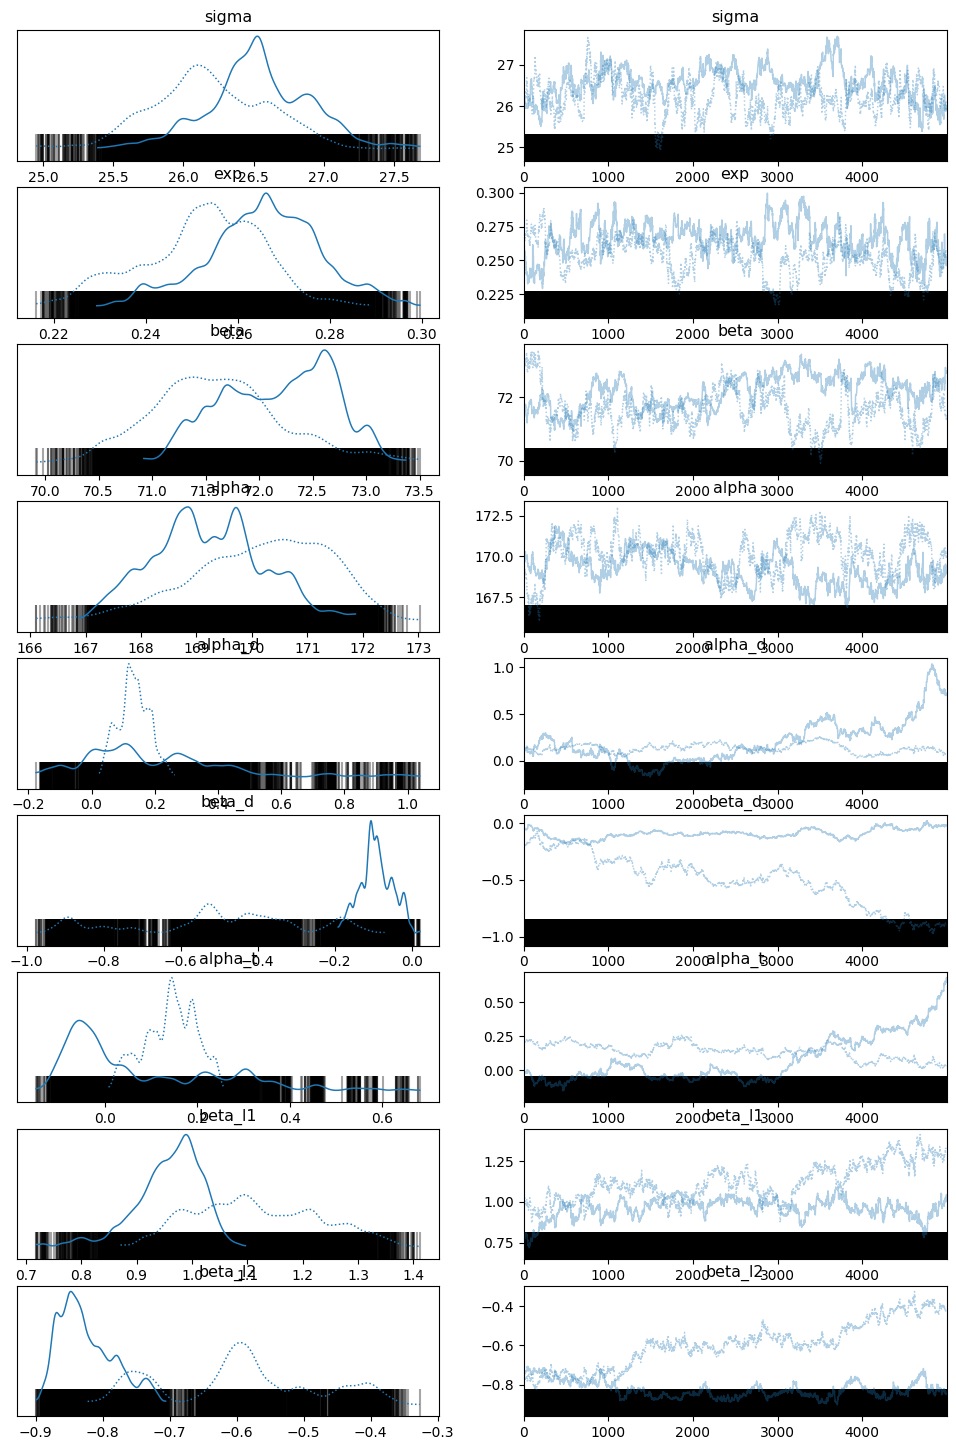

<Figure size 1000x600 with 0 Axes>

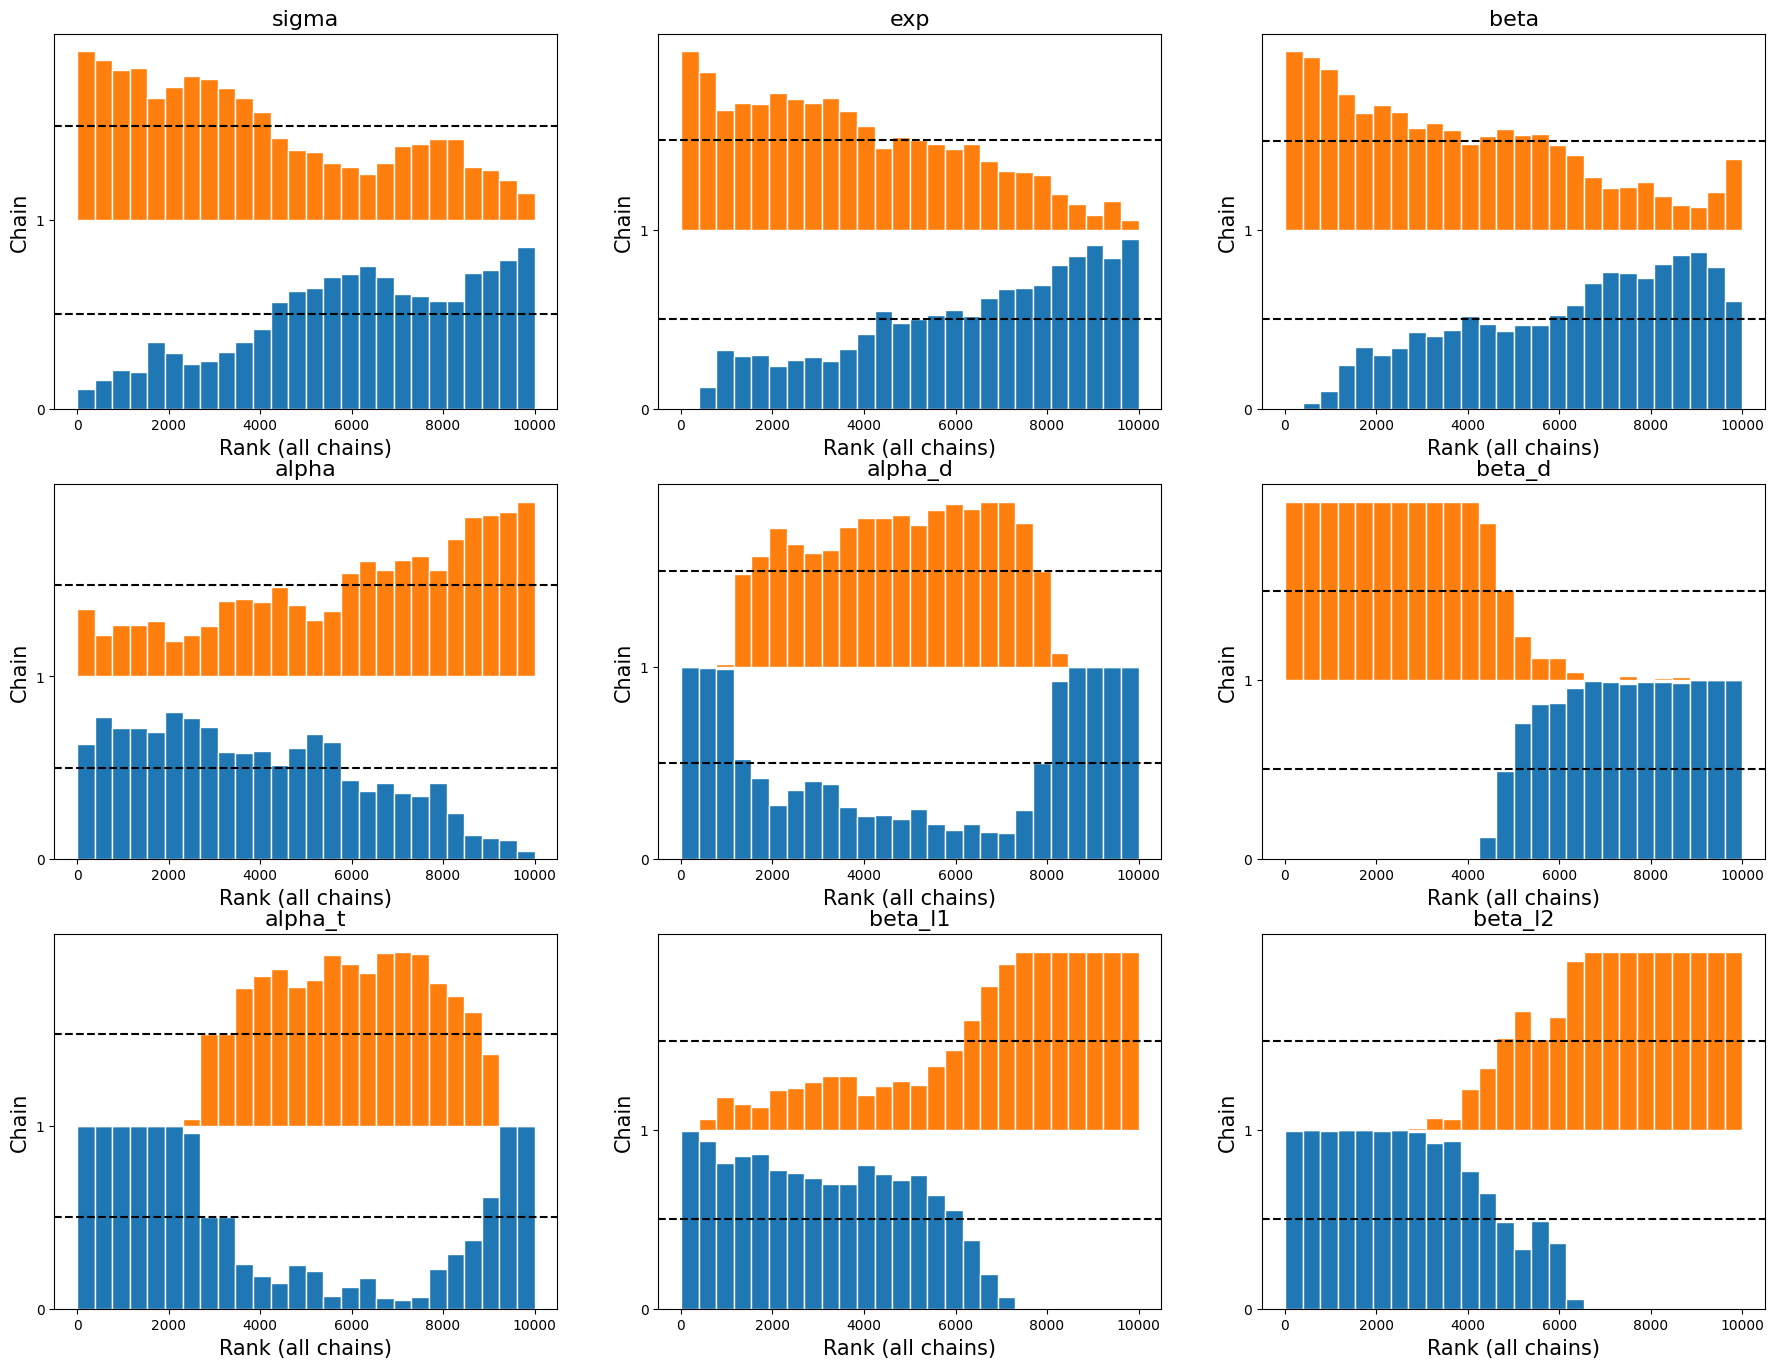

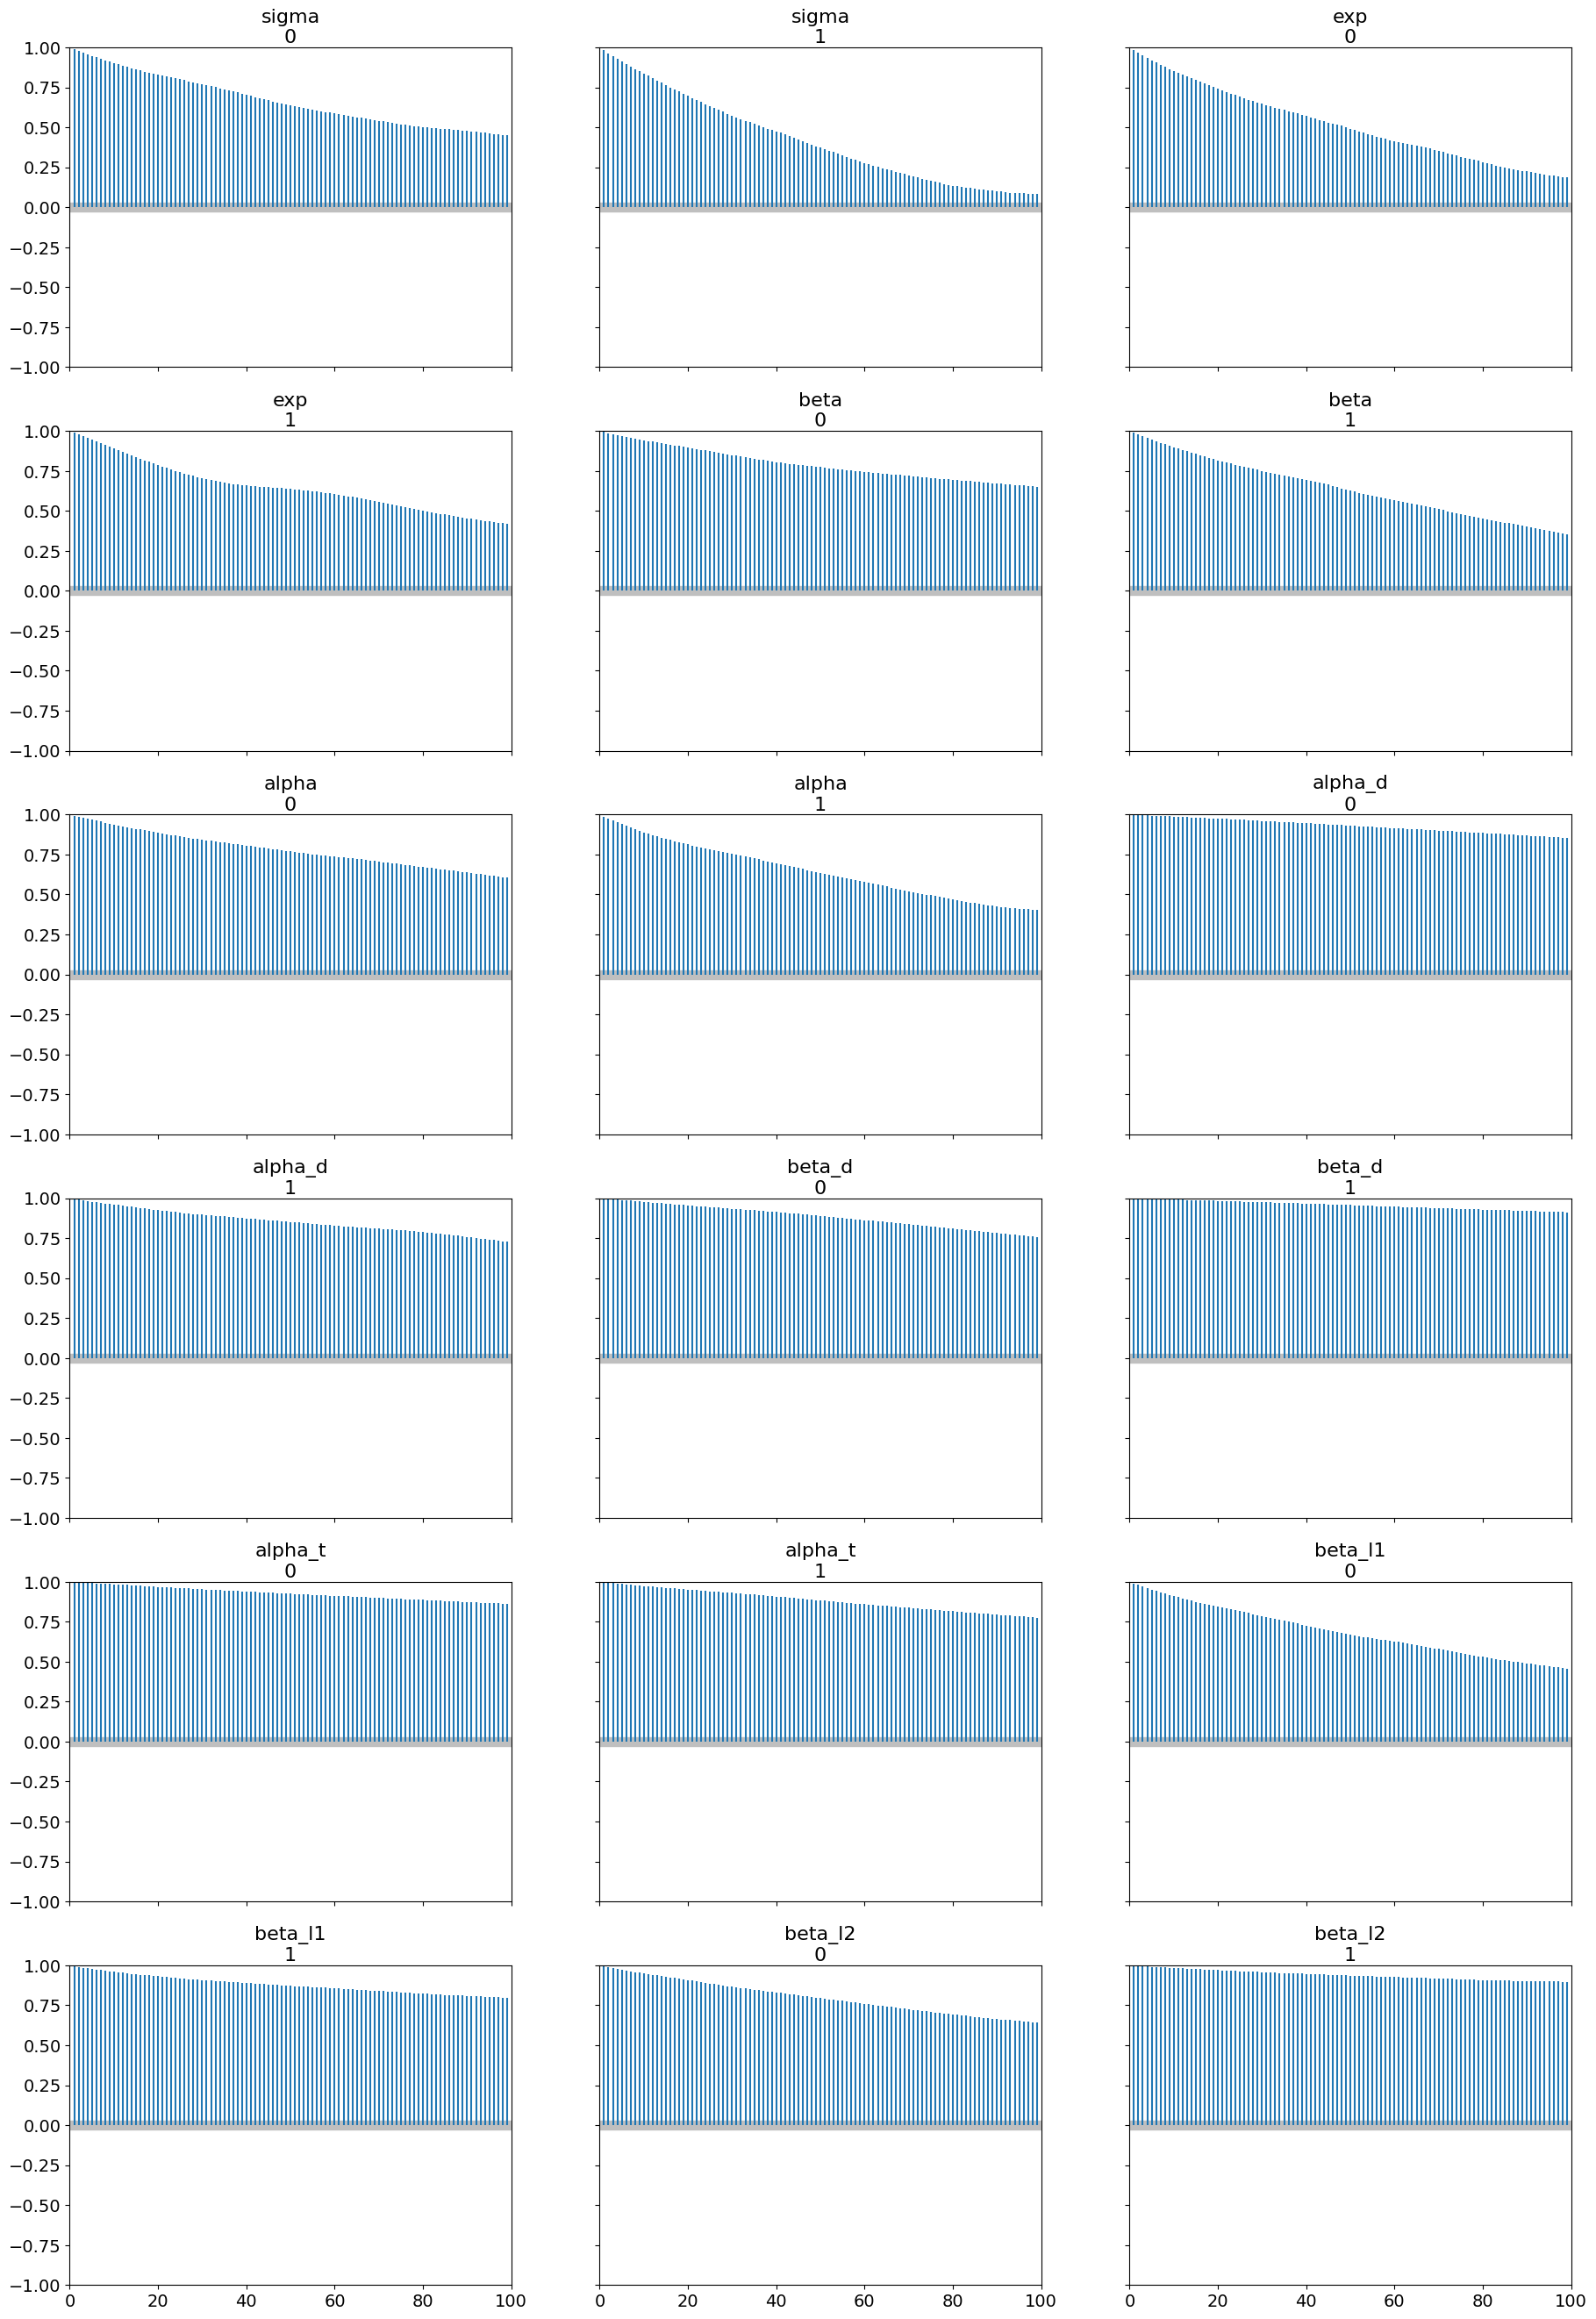

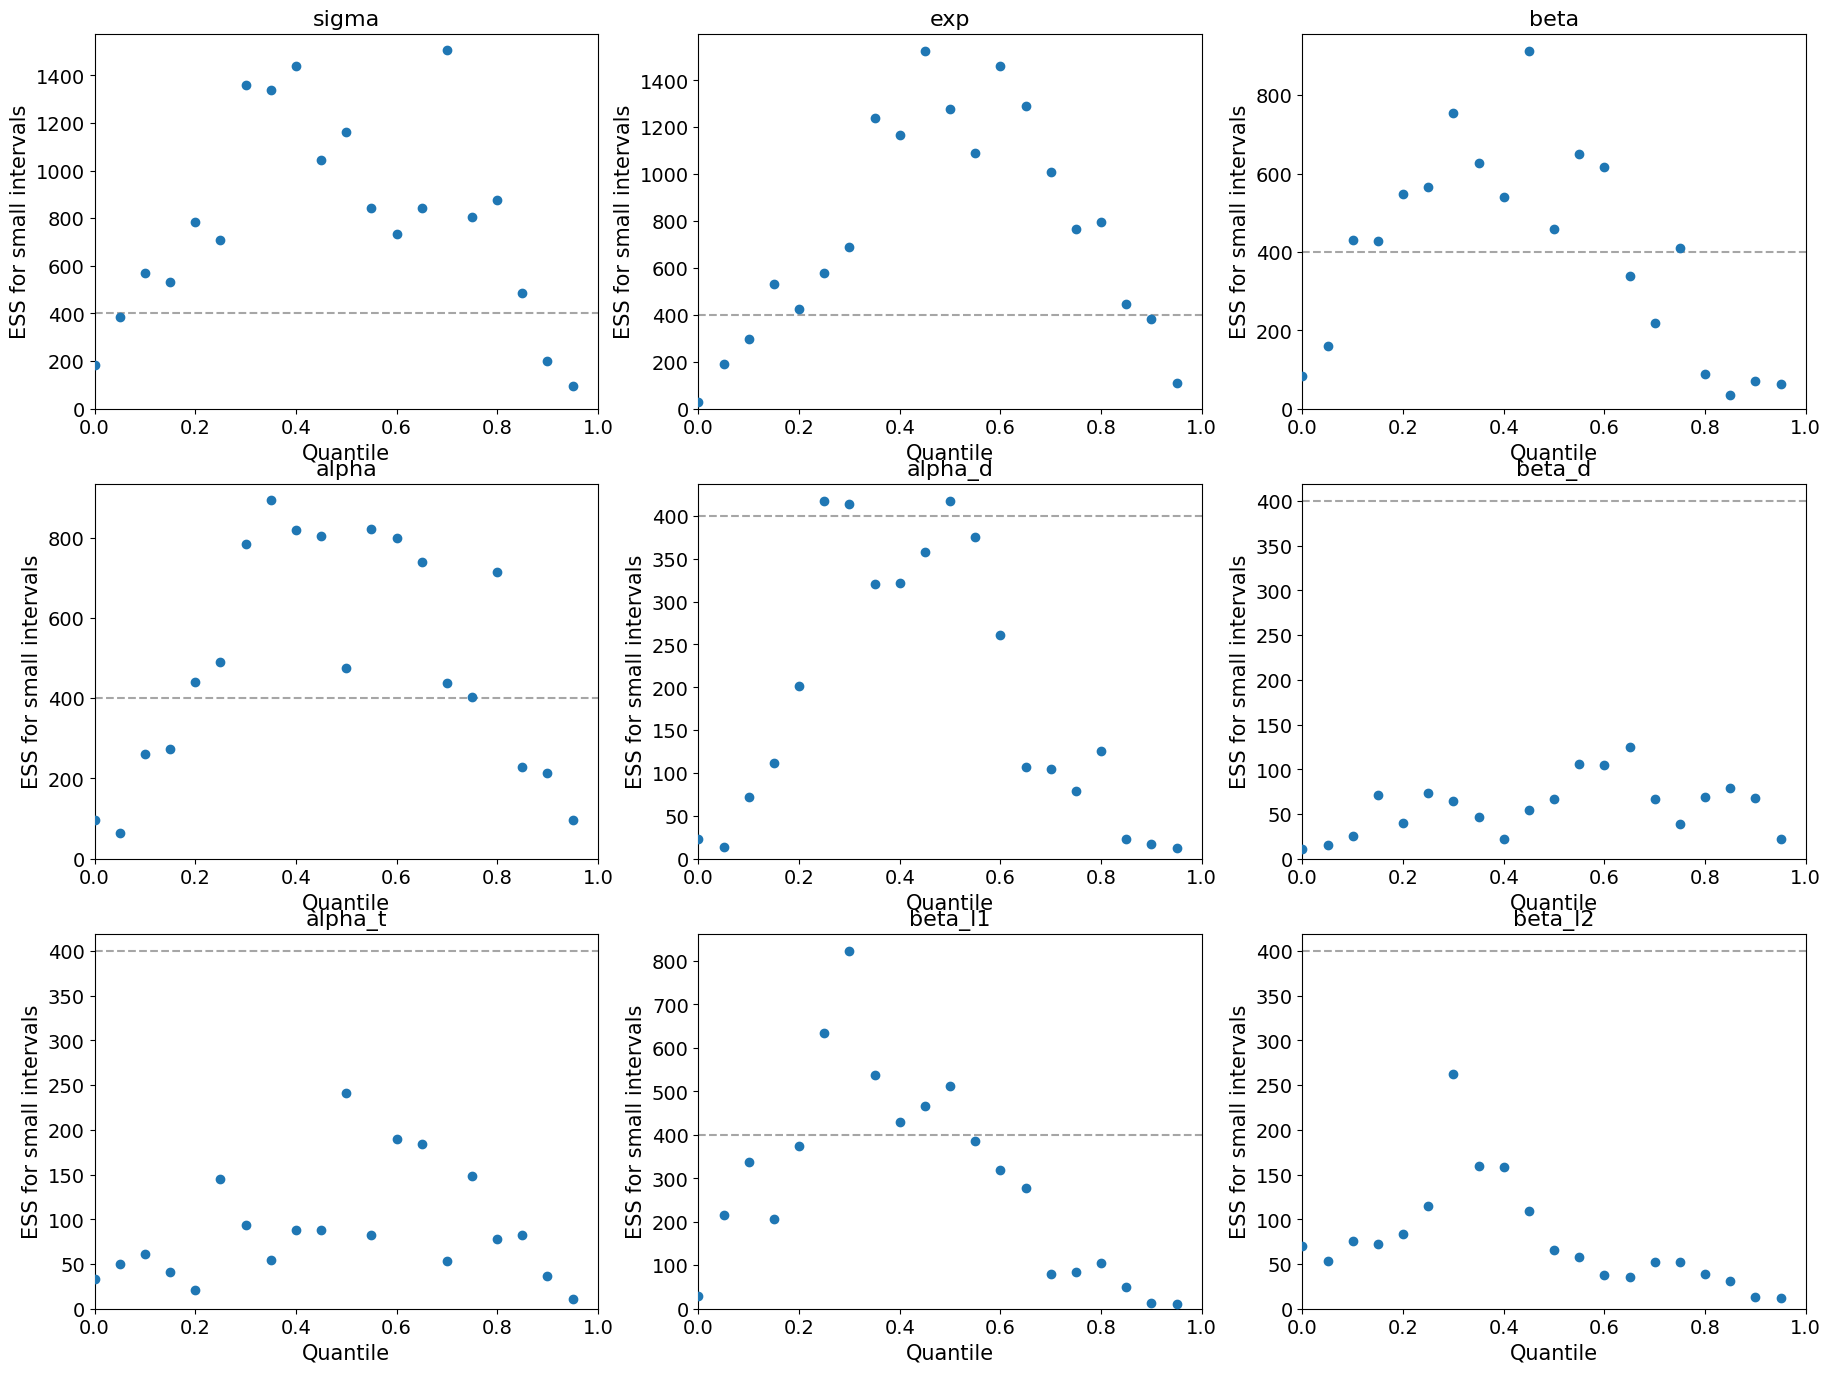

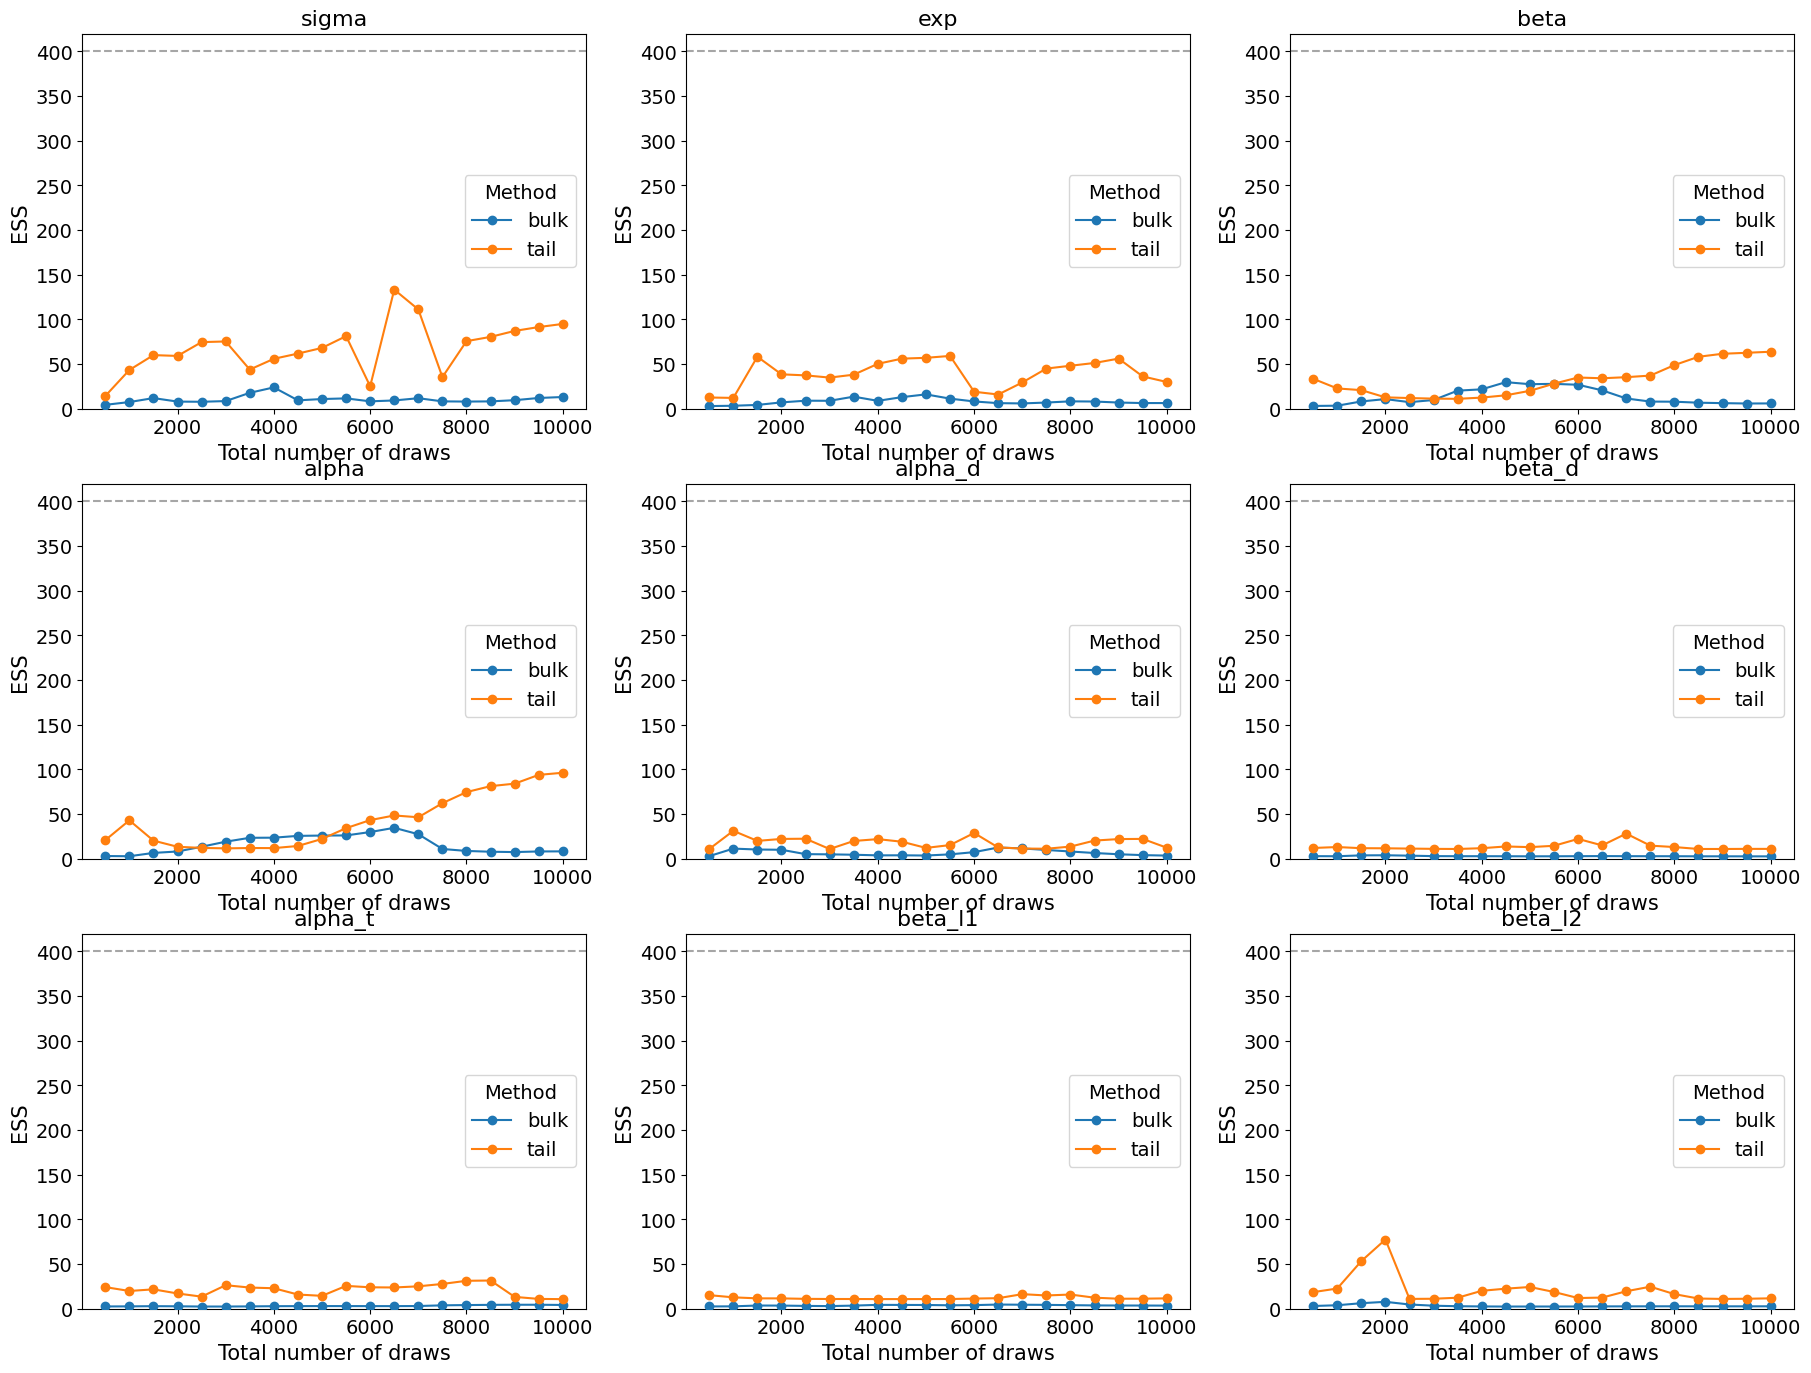

IS THE MODEL GOOD?


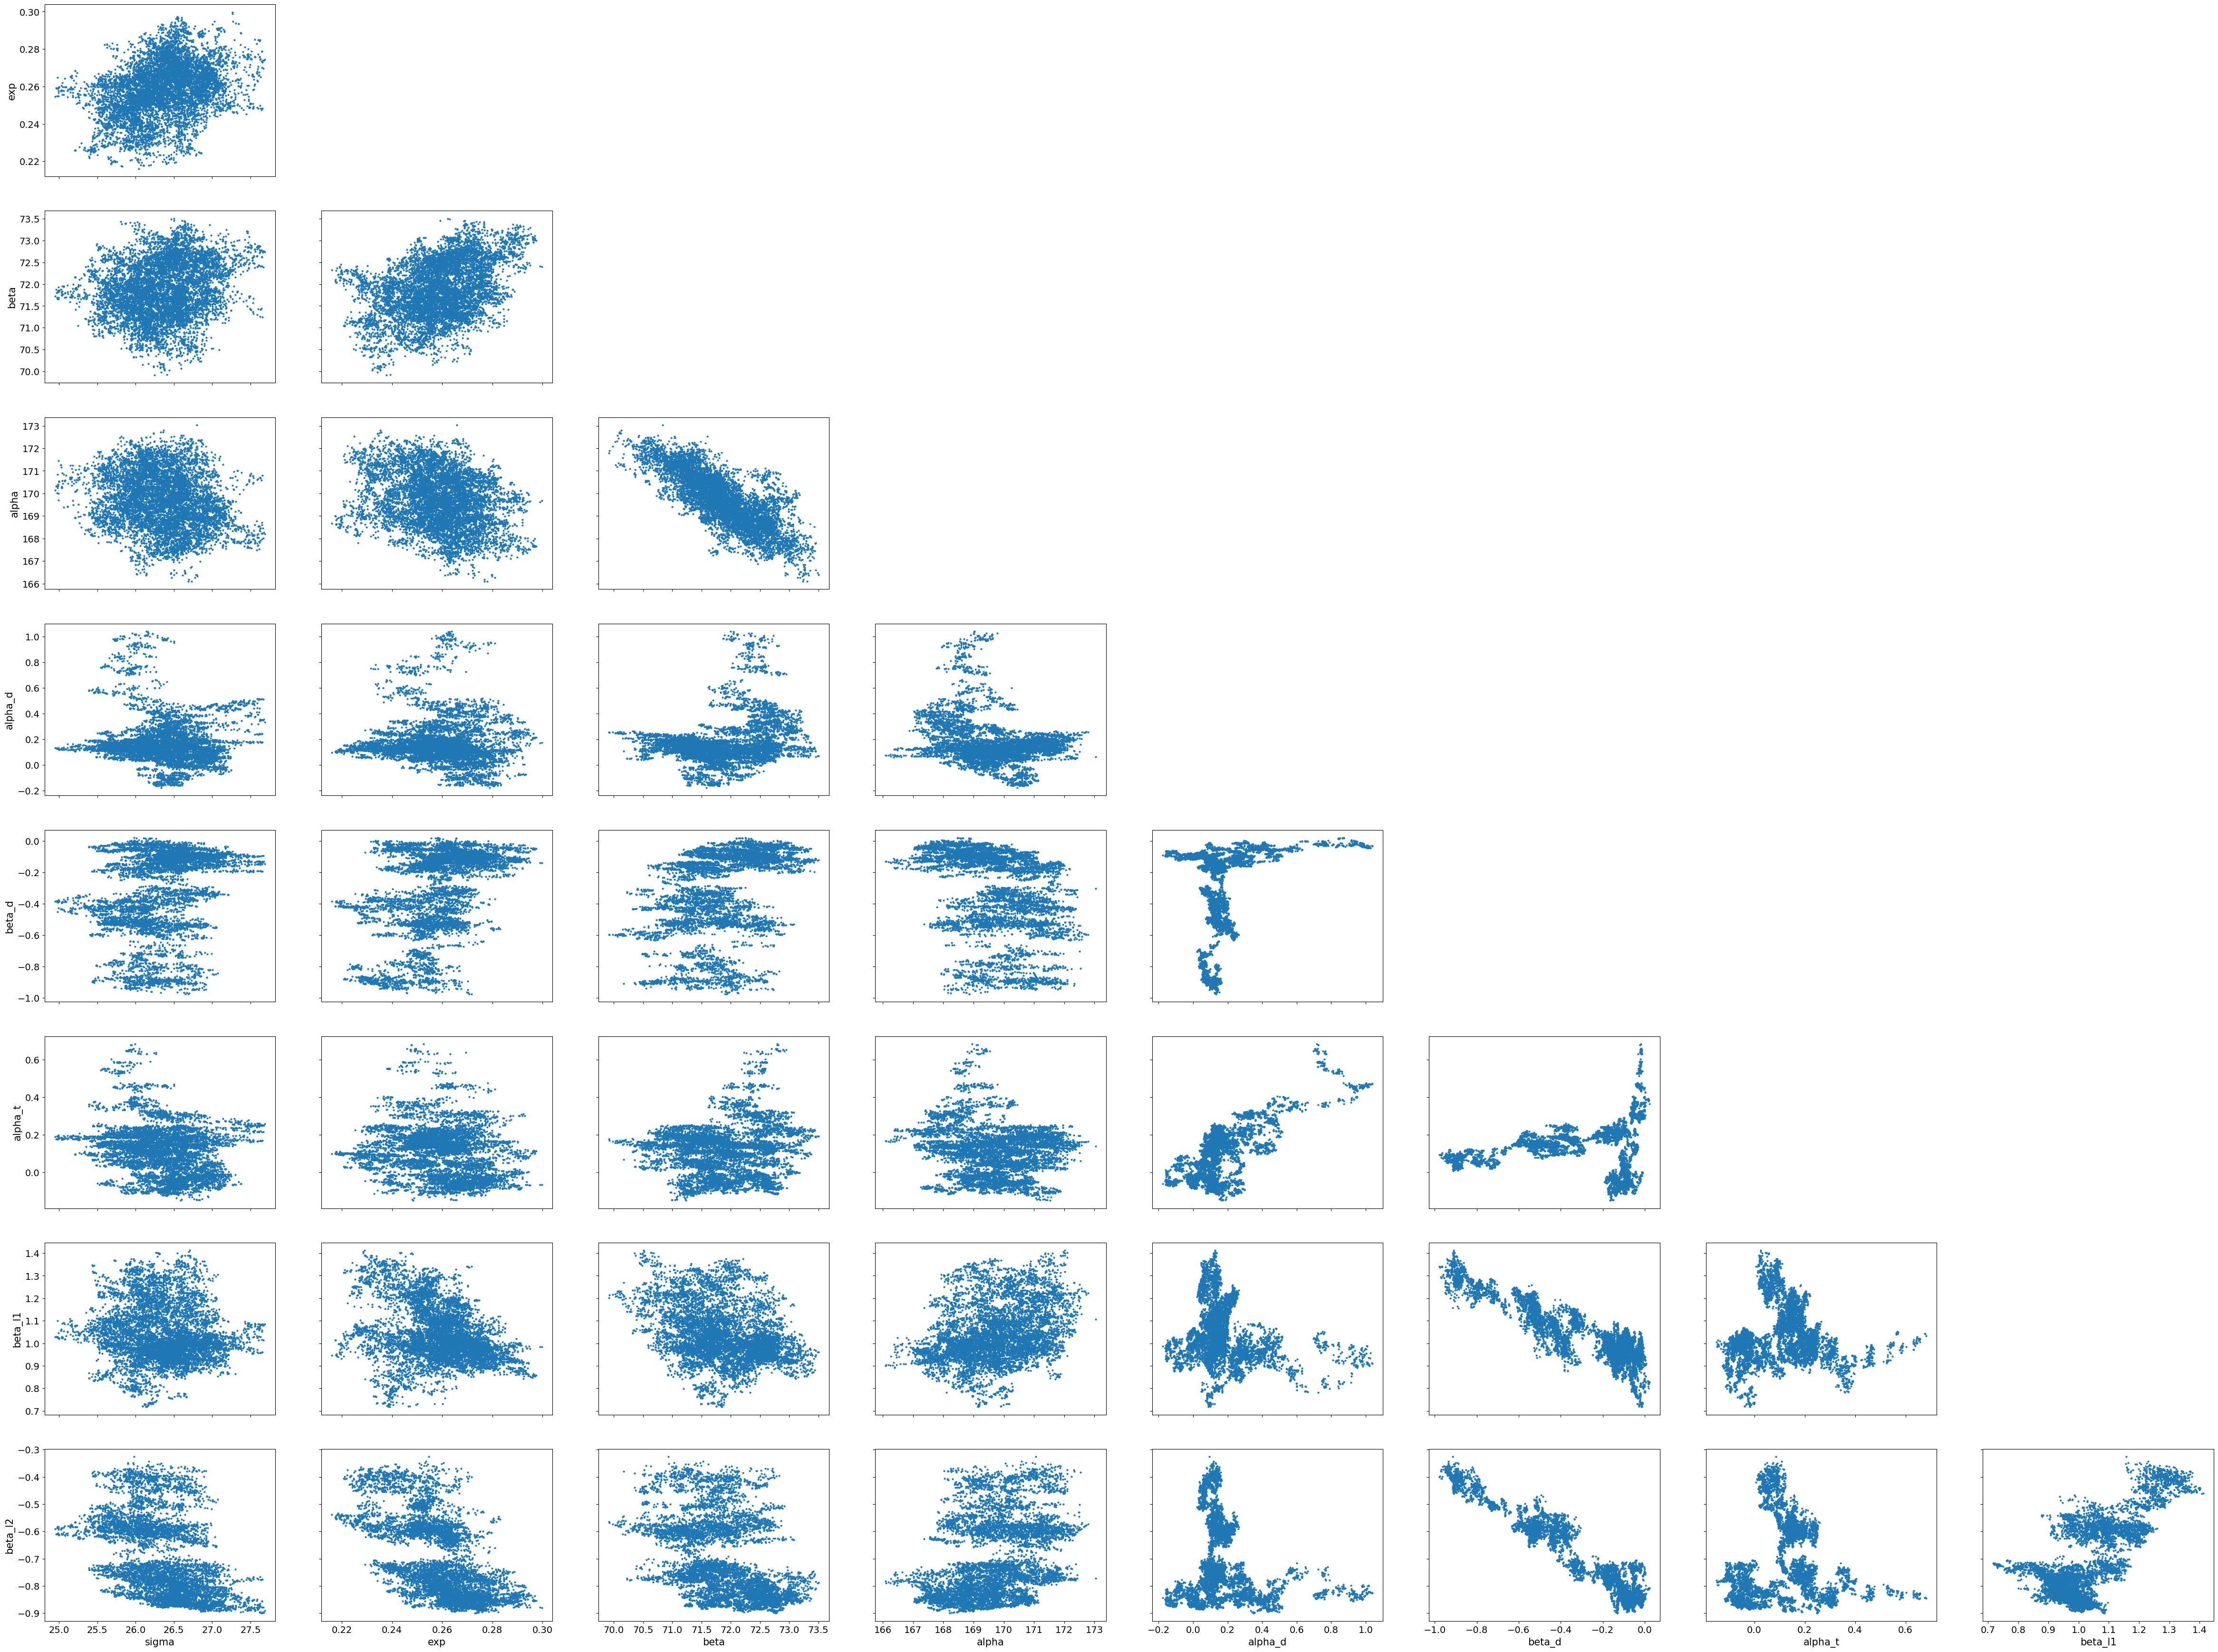

In [202]:
idata = az.from_pystan(posterior=fit, posterior_model=compiled_model)
plot_stuff_about_model(idata, stan_data, fit)